In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.transforms
import matplotlib as mpl
%matplotlib inline

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('xx-small')
mpl.rcParams['figure.dpi'] = 300

import warnings
warnings.filterwarnings("ignore")

# Data Exploration

### from Frequency

In [2]:
df_fr = pd.read_excel('fsp_fr.xlsx')
df_fr.drop(columns='Unnamed: 0', inplace=True)

df_fr_p = df_fr.loc[0:19,:]
df_fr_n = df_fr.loc[20:40,:]
df_fr_n.reset_index(drop=True, inplace=True)

df_fr_p['Rank'] = df_fr_p.index + 1
df_fr_n['Rank'] = df_fr_n.index + 1

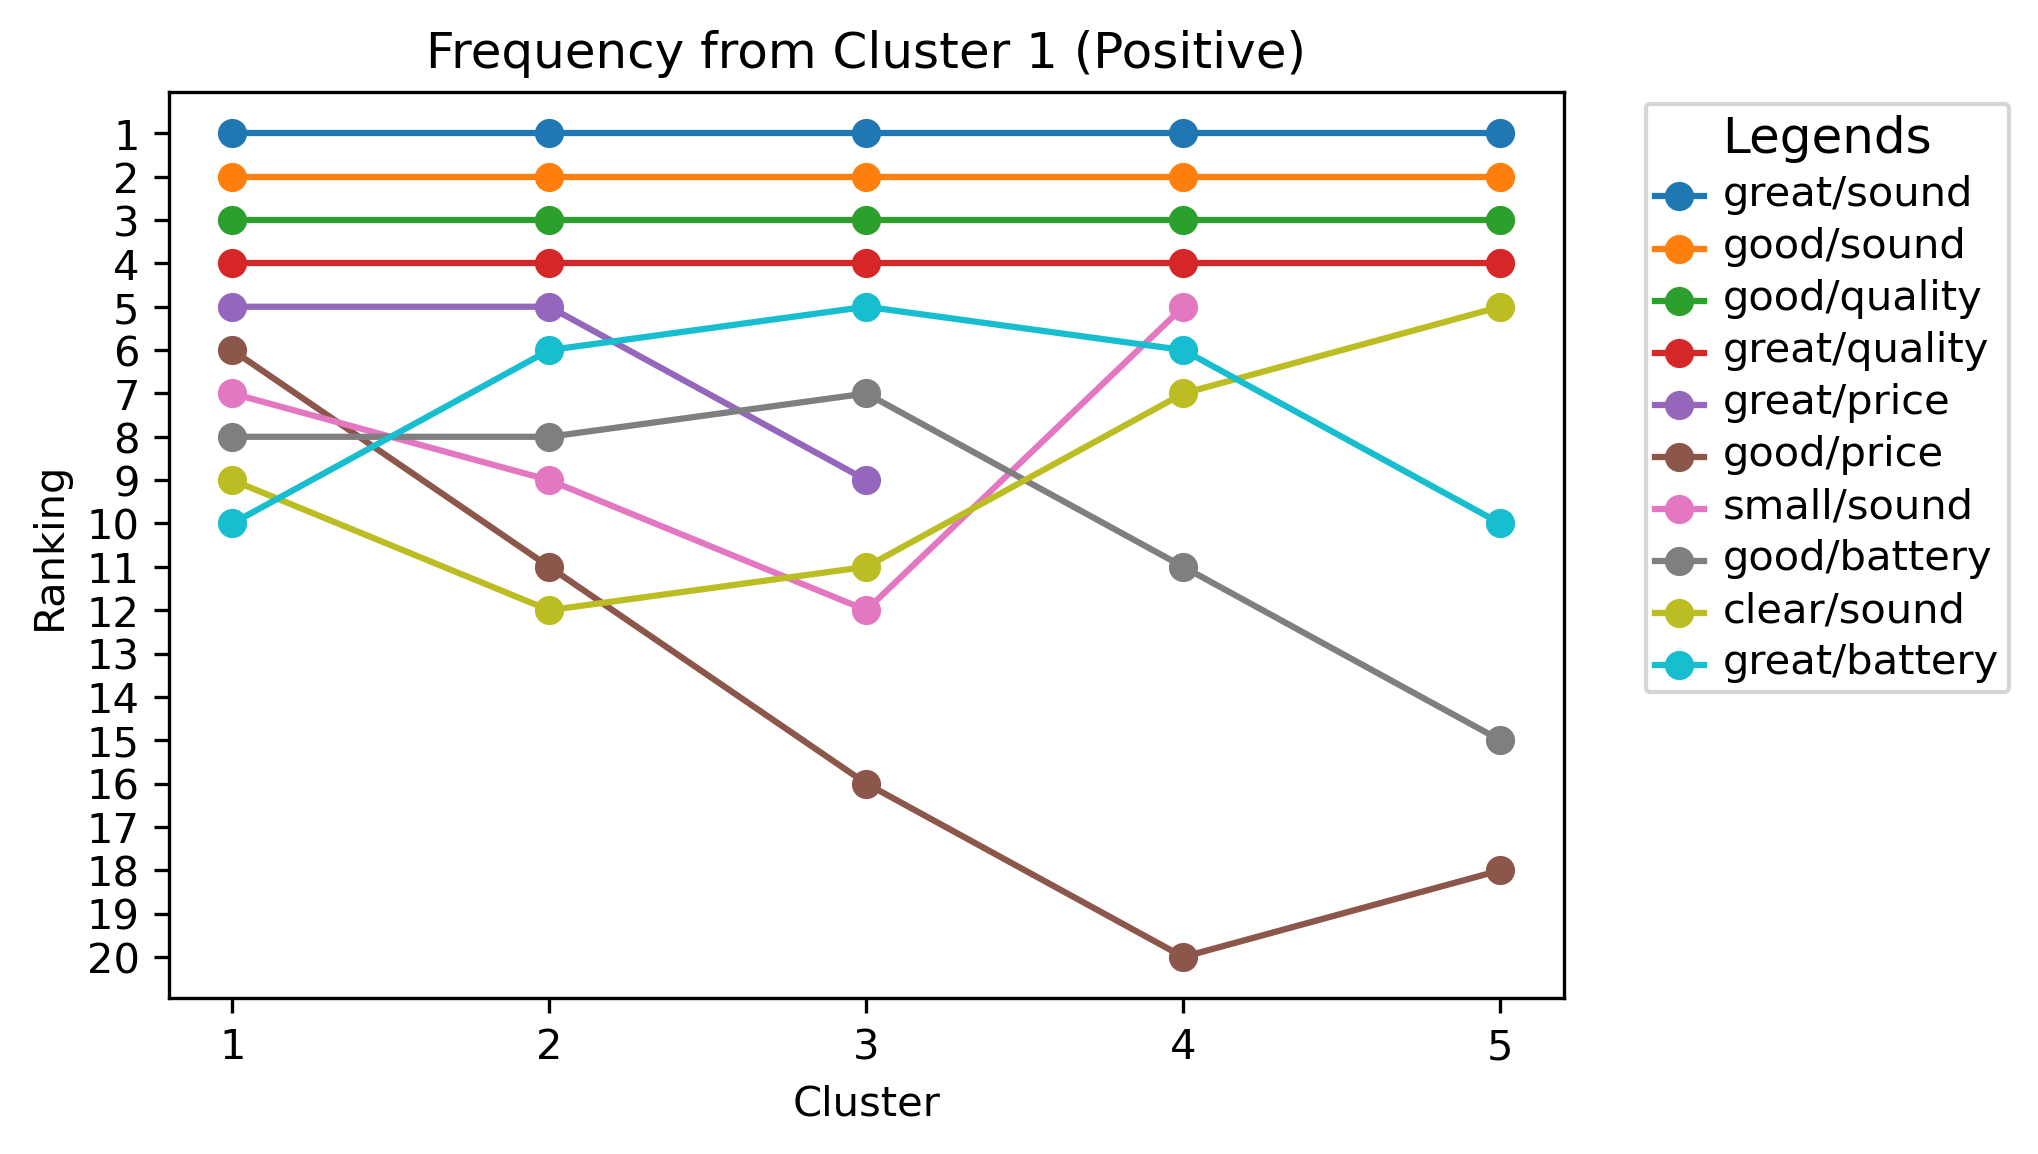

<Figure size 30000x30000 with 0 Axes>

In [3]:
for i in range(10):
    a = df_fr_p['Feature'][i]
    x = np.array([1,2,3,4,5])
    y = np.array([df_fr_p[df_fr_p['Feature'] == a]['Rank'].to_string(index=False),
                  df_fr_p[df_fr_p['Feature.1'] == a]['Rank'].to_string(index=False),
                  df_fr_p[df_fr_p['Feature.2'] == a]['Rank'].to_string(index=False),
                  df_fr_p[df_fr_p['Feature.3'] == a]['Rank'].to_string(index=False),
                  df_fr_p[df_fr_p['Feature.4'] == a]['Rank'].to_string(index=False)])
    for b, word in enumerate(y):
        if word == 'Series([], )':
            y[b] = 'nan'
    y = y.astype(float)
    
    plt.plot(x, y, 'o-', label=a)
    plt.xticks(x)
    plt.yticks(np.arange(1, 21, step=1))
    legend = plt.legend(title='Legends', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
    legend.get_title().set_fontsize('12') #legend 'Title' fontsize
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='10') #legend 'List' fontsize

plt.title('Frequency from Cluster 1 (Positive)')
plt.xlabel('Cluster')
plt.ylabel('Ranking')
plt.gca().invert_yaxis()
plt.figure(figsize=(100,100));

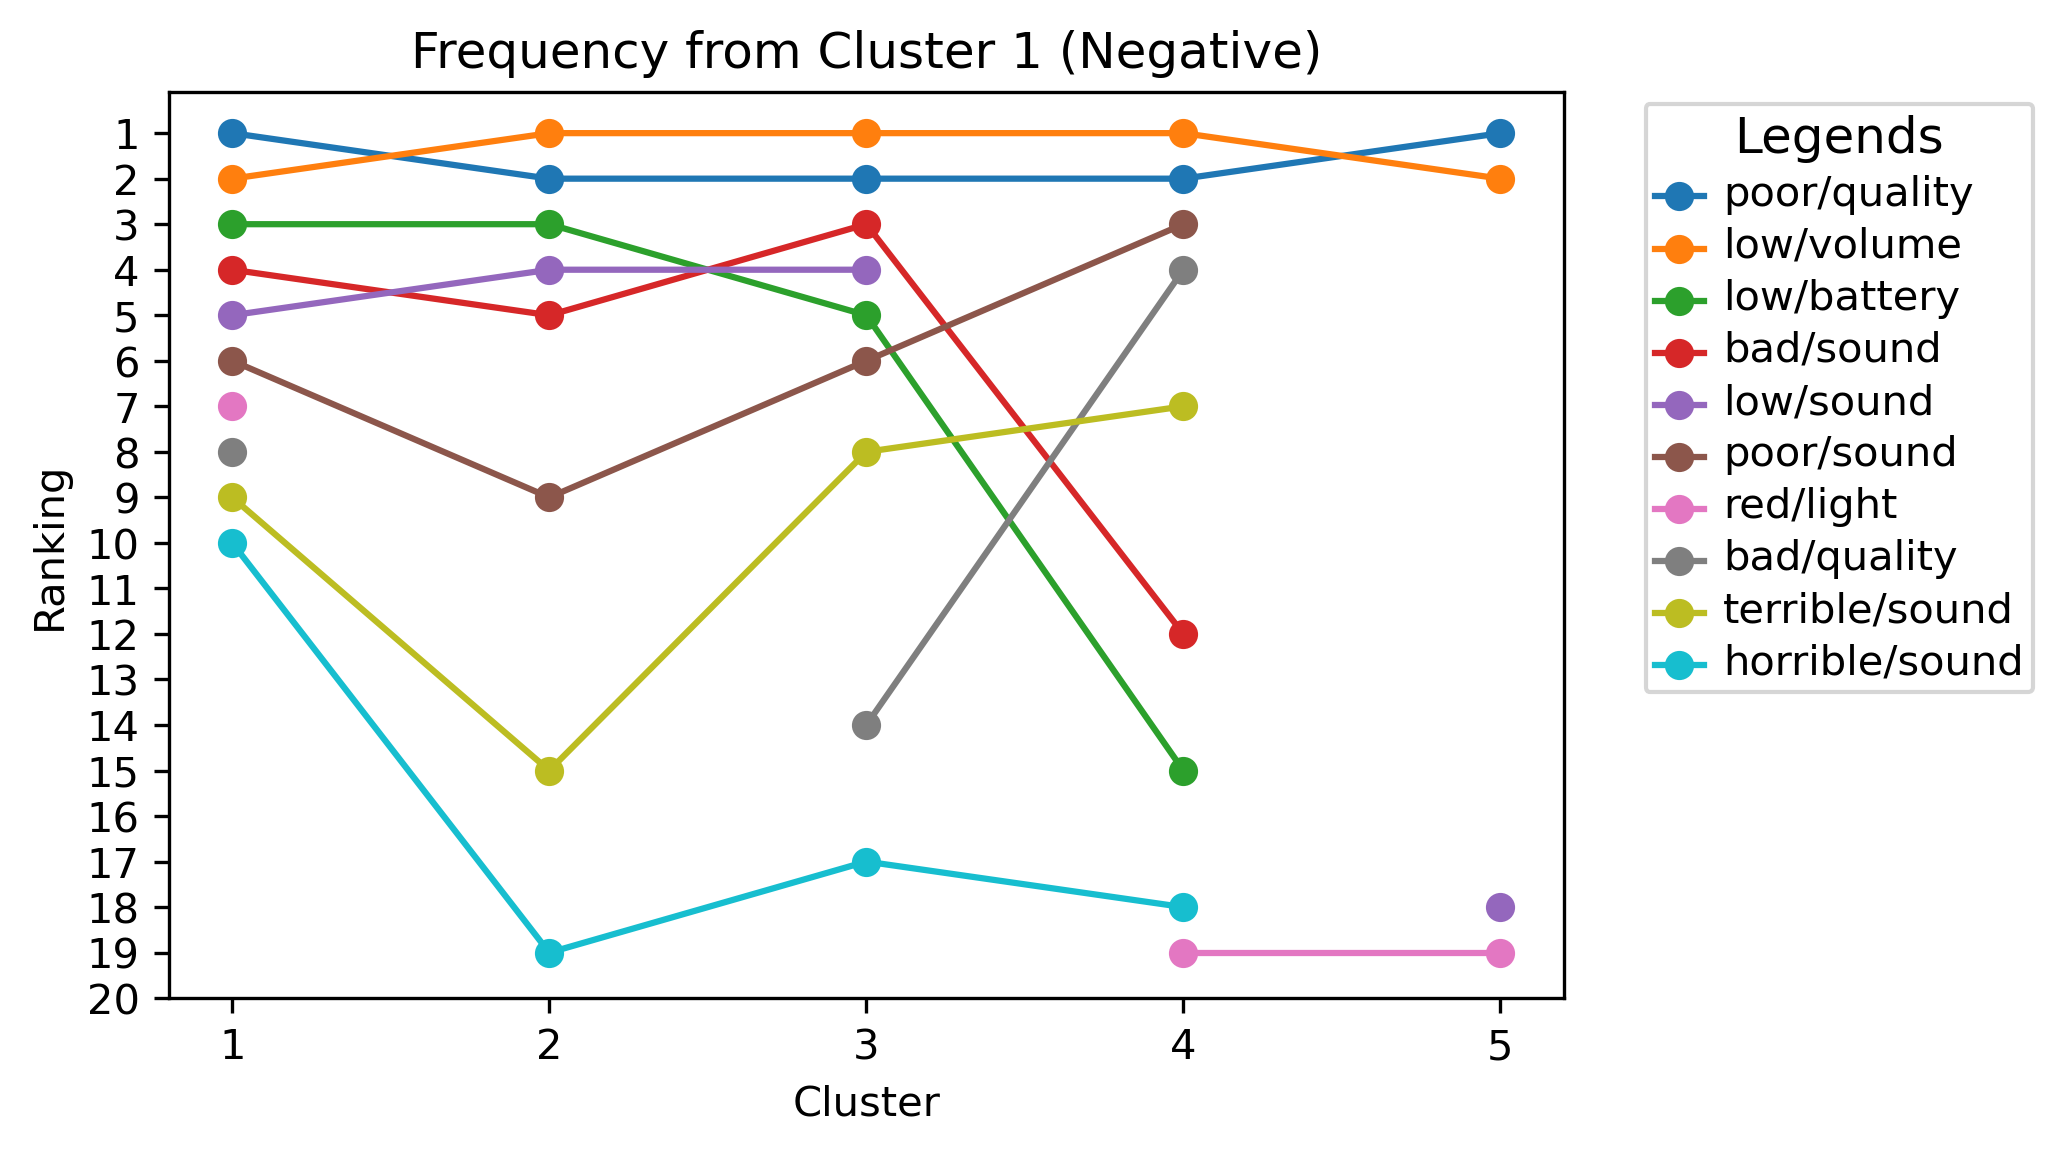

<Figure size 30000x30000 with 0 Axes>

In [4]:
for i in range(10):
    a = df_fr_n['Feature'][i]
    x = np.array([1,2,3,4,5])
    y = np.array([df_fr_n[df_fr_n['Feature'] == a]['Rank'].to_string(index=False),
                  df_fr_n[df_fr_n['Feature.1'] == a]['Rank'].to_string(index=False),
                  df_fr_n[df_fr_n['Feature.2'] == a]['Rank'].to_string(index=False),
                  df_fr_n[df_fr_n['Feature.3'] == a]['Rank'].to_string(index=False),
                  df_fr_n[df_fr_n['Feature.4'] == a]['Rank'].to_string(index=False)])
    for b, word in enumerate(y):
        if word == 'Series([], )':
            y[b] = 'nan'
    y = y.astype(float)
    
    plt.plot(x, y, 'o-', label=a)
    plt.xticks(x)
    plt.yticks(np.arange(1, 21, step=1))
    legend = plt.legend(title='Legends', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
    legend.get_title().set_fontsize('12') #legend 'Title' fontsize
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='10') #legend 'List' fontsize

plt.title('Frequency from Cluster 1 (Negative)')
plt.xlabel('Cluster')
plt.ylabel('Ranking')
plt.gca().invert_yaxis()
plt.figure(figsize=(100,100));

### from Strength

In [5]:
df_st = pd.read_excel('fsp_st.xlsx')
df_st.drop(columns='Unnamed: 0', inplace=True)

df_st_p = df_st.loc[0:19,:]
df_st_n = df_st.loc[20:40,:]
df_st_n.reset_index(drop=True, inplace=True)

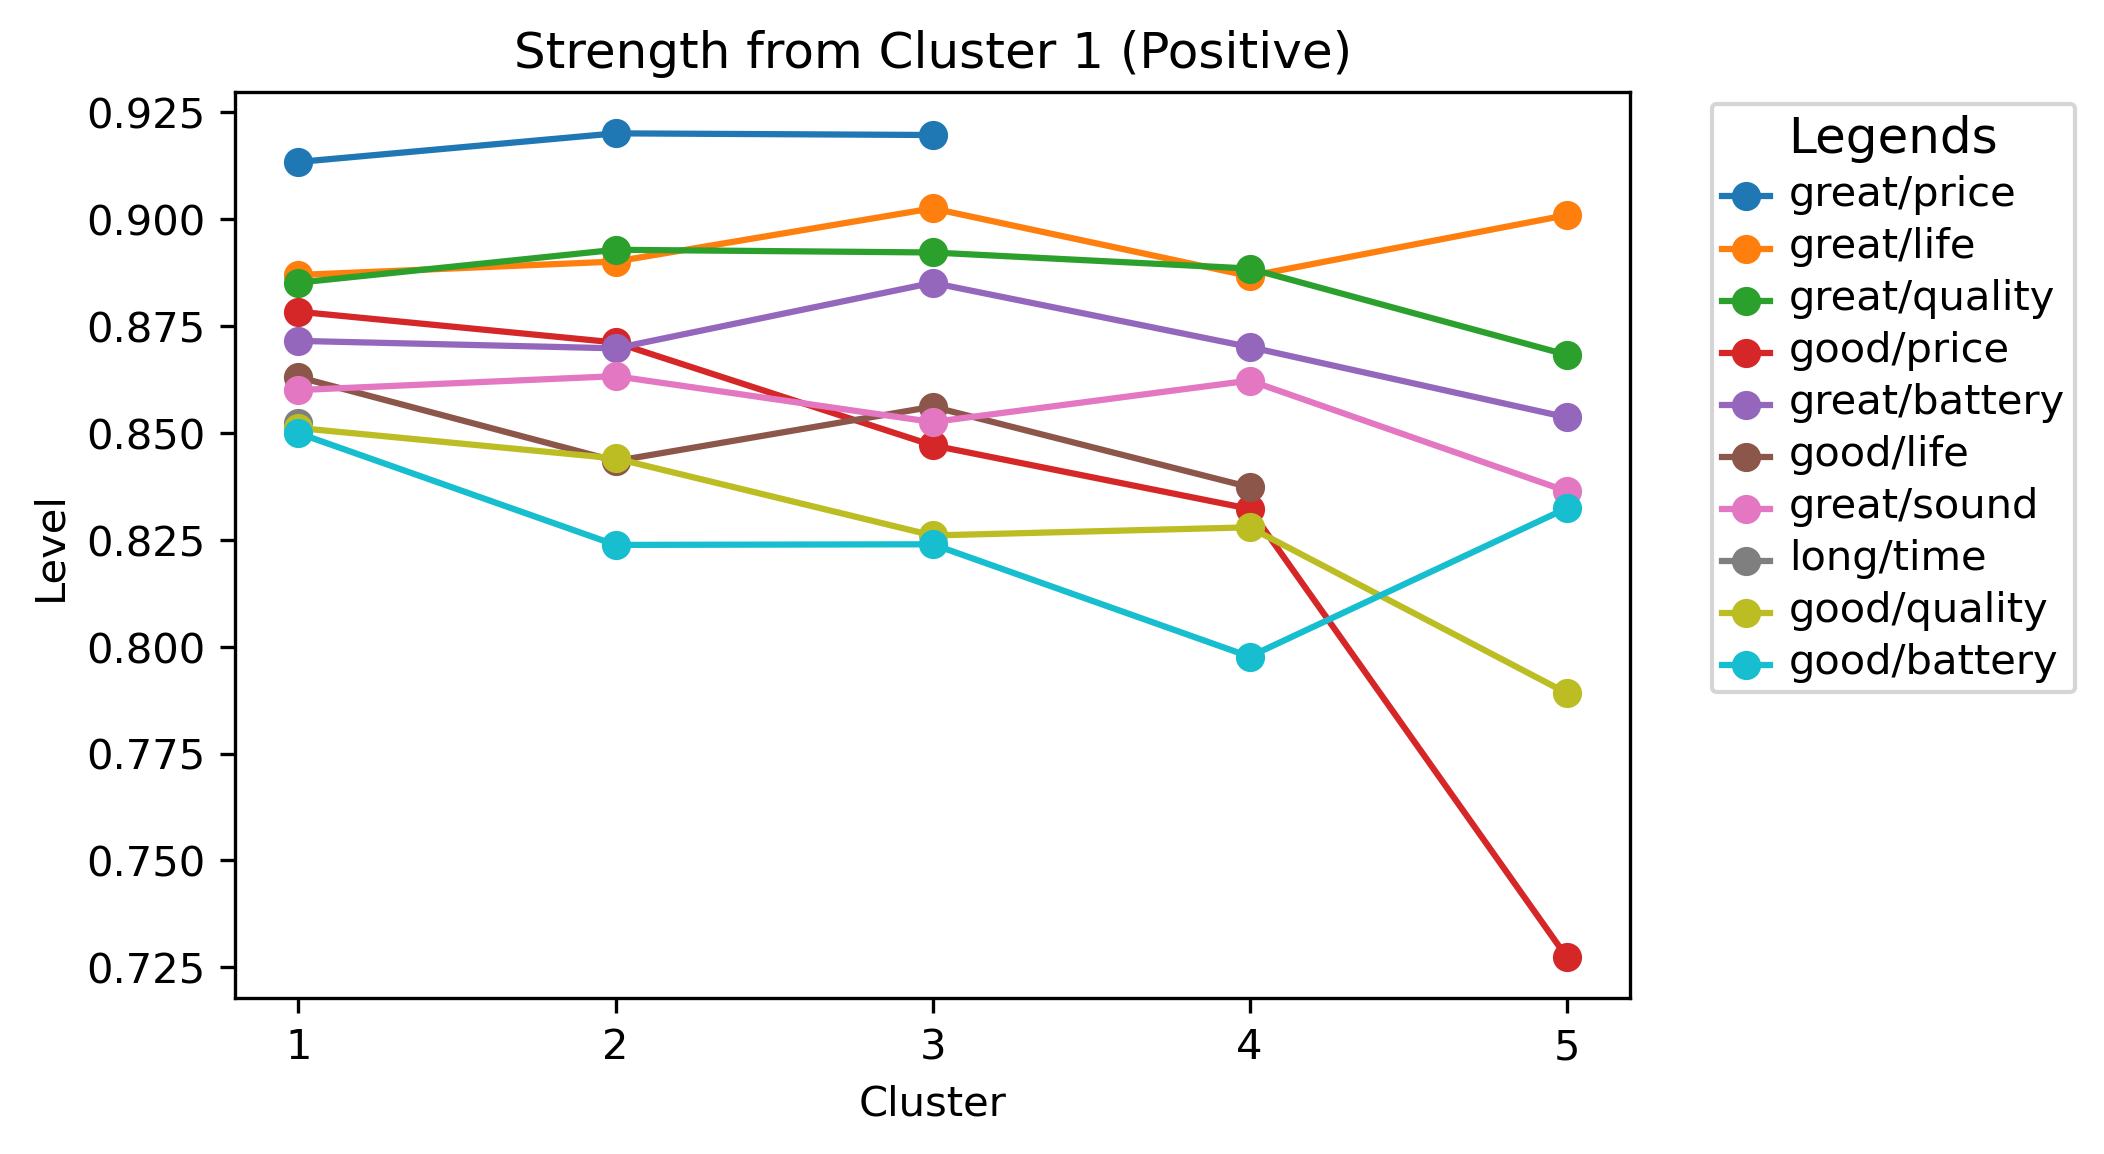

<Figure size 30000x30000 with 0 Axes>

In [6]:
for i in range(10):
    a = df_st_p['Feature'][i]
    x = np.array([1,2,3,4,5])
    y = np.array([df_st_p[df_st_p['Feature'] == a]['Strength'].to_string(index=False),
                  df_st_p[df_st_p['Feature.1'] == a]['Strength.1'].to_string(index=False),
                  df_st_p[df_st_p['Feature.2'] == a]['Strength.2'].to_string(index=False),
                  df_st_p[df_st_p['Feature.3'] == a]['Strength.3'].to_string(index=False),
                  df_st_p[df_st_p['Feature.4'] == a]['Strength.4'].to_string(index=False)])
    for b, word in enumerate(y):
        if word == 'Series([], )':
            y[b] = 'nan'
    y = y.astype(float)
    
    plt.plot(x, y, 'o-', label=a)
    plt.xticks(x)
    legend = plt.legend(title='Legends', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
    legend.get_title().set_fontsize('12') #legend 'Title' fontsize
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='10') #legend 'List' fontsize

plt.title('Strength from Cluster 1 (Positive)')
plt.xlabel('Cluster')
plt.ylabel('Level')
plt.figure(figsize=(100,100));

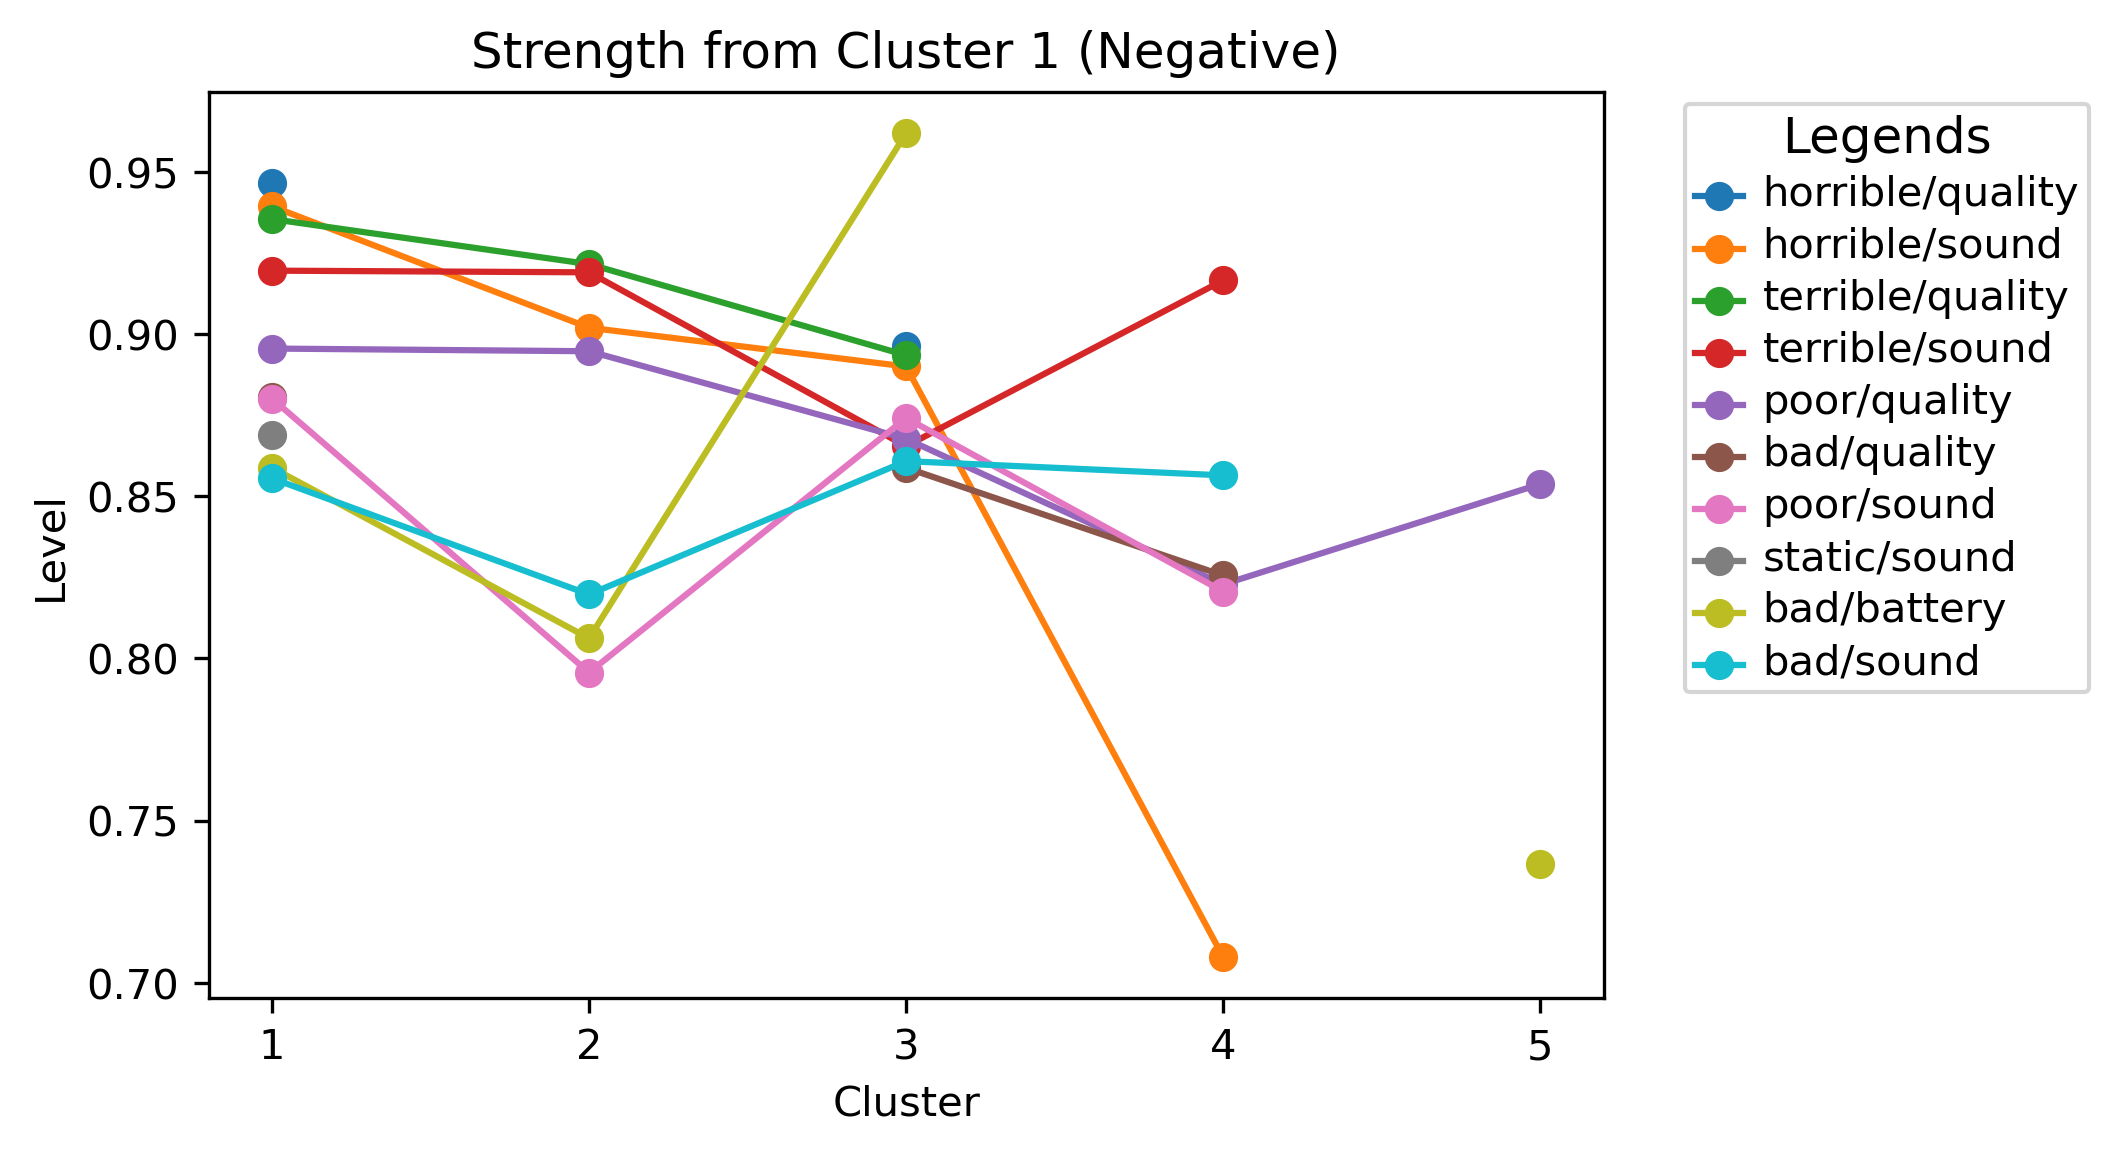

<Figure size 30000x30000 with 0 Axes>

In [7]:
for i in range(10):
    a = df_st_n['Feature'][i]
    x = np.array([1,2,3,4,5])
    y = np.array([df_st_n[df_st_n['Feature'] == a]['Strength'].to_string(index=False),
                  df_st_n[df_st_n['Feature.1'] == a]['Strength.1'].to_string(index=False),
                  df_st_n[df_st_n['Feature.2'] == a]['Strength.2'].to_string(index=False),
                  df_st_n[df_st_n['Feature.3'] == a]['Strength.3'].to_string(index=False),
                  df_st_n[df_st_n['Feature.4'] == a]['Strength.4'].to_string(index=False)])
    for b, word in enumerate(y):
        if word == 'Series([], )':
            y[b] = 'nan'
    y = y.astype(float)
    
    plt.plot(x, y, 'o-', label=a)
    plt.xticks(x)
    legend = plt.legend(title='Legends', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
    legend.get_title().set_fontsize('12') #legend 'Title' fontsize
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='10') #legend 'List' fontsize

plt.title('Strength from Cluster 1 (Negative)')
plt.xlabel('Cluster')
plt.ylabel('Level')
plt.figure(figsize=(100,100));

# Analysis

### Unique Nouns in Features

In [8]:
import collections
from collections import OrderedDict

feat_p = df_st_p['Feature'].tolist() + df_st_p['Feature.1'].tolist() + df_st_p['Feature.2'].tolist() + df_st_p['Feature.3'].tolist() + df_st_p['Feature.4'].tolist()
feat_p = [item for item, count in collections.Counter(feat_p).items() if count == 5]

feat_p_noun = []
for word in feat_p:
    a = word.rsplit('/', 1)[1]
    feat_p_noun.append(a)
feat_p_noun = list(OrderedDict.fromkeys(feat_p_noun))

print('positve nouns:')
print(feat_p_noun)

positve nouns:
['life', 'quality', 'price', 'battery', 'sound', 'bass']


In [9]:
feat_n = df_st_n['Feature'].tolist() + df_st_n['Feature.1'].tolist() + df_st_n['Feature.2'].tolist() + df_st_n['Feature.3'].tolist() + df_st_n['Feature.4'].tolist()
feat_n = [item for item, count in collections.Counter(feat_n).items() if count == 5]

feat_n_noun = []
for word in feat_n:
    a = word.rsplit('/', 1)[1]
    feat_n_noun.append(a)
feat_n_noun = list(OrderedDict.fromkeys(feat_n_noun))

print('negative nouns:')
print(feat_n_noun)

negative nouns:
['quality', 'battery', 'volume']


### Frequency

['life', 'quality', 'price', 'battery', 'sound', 'bass']


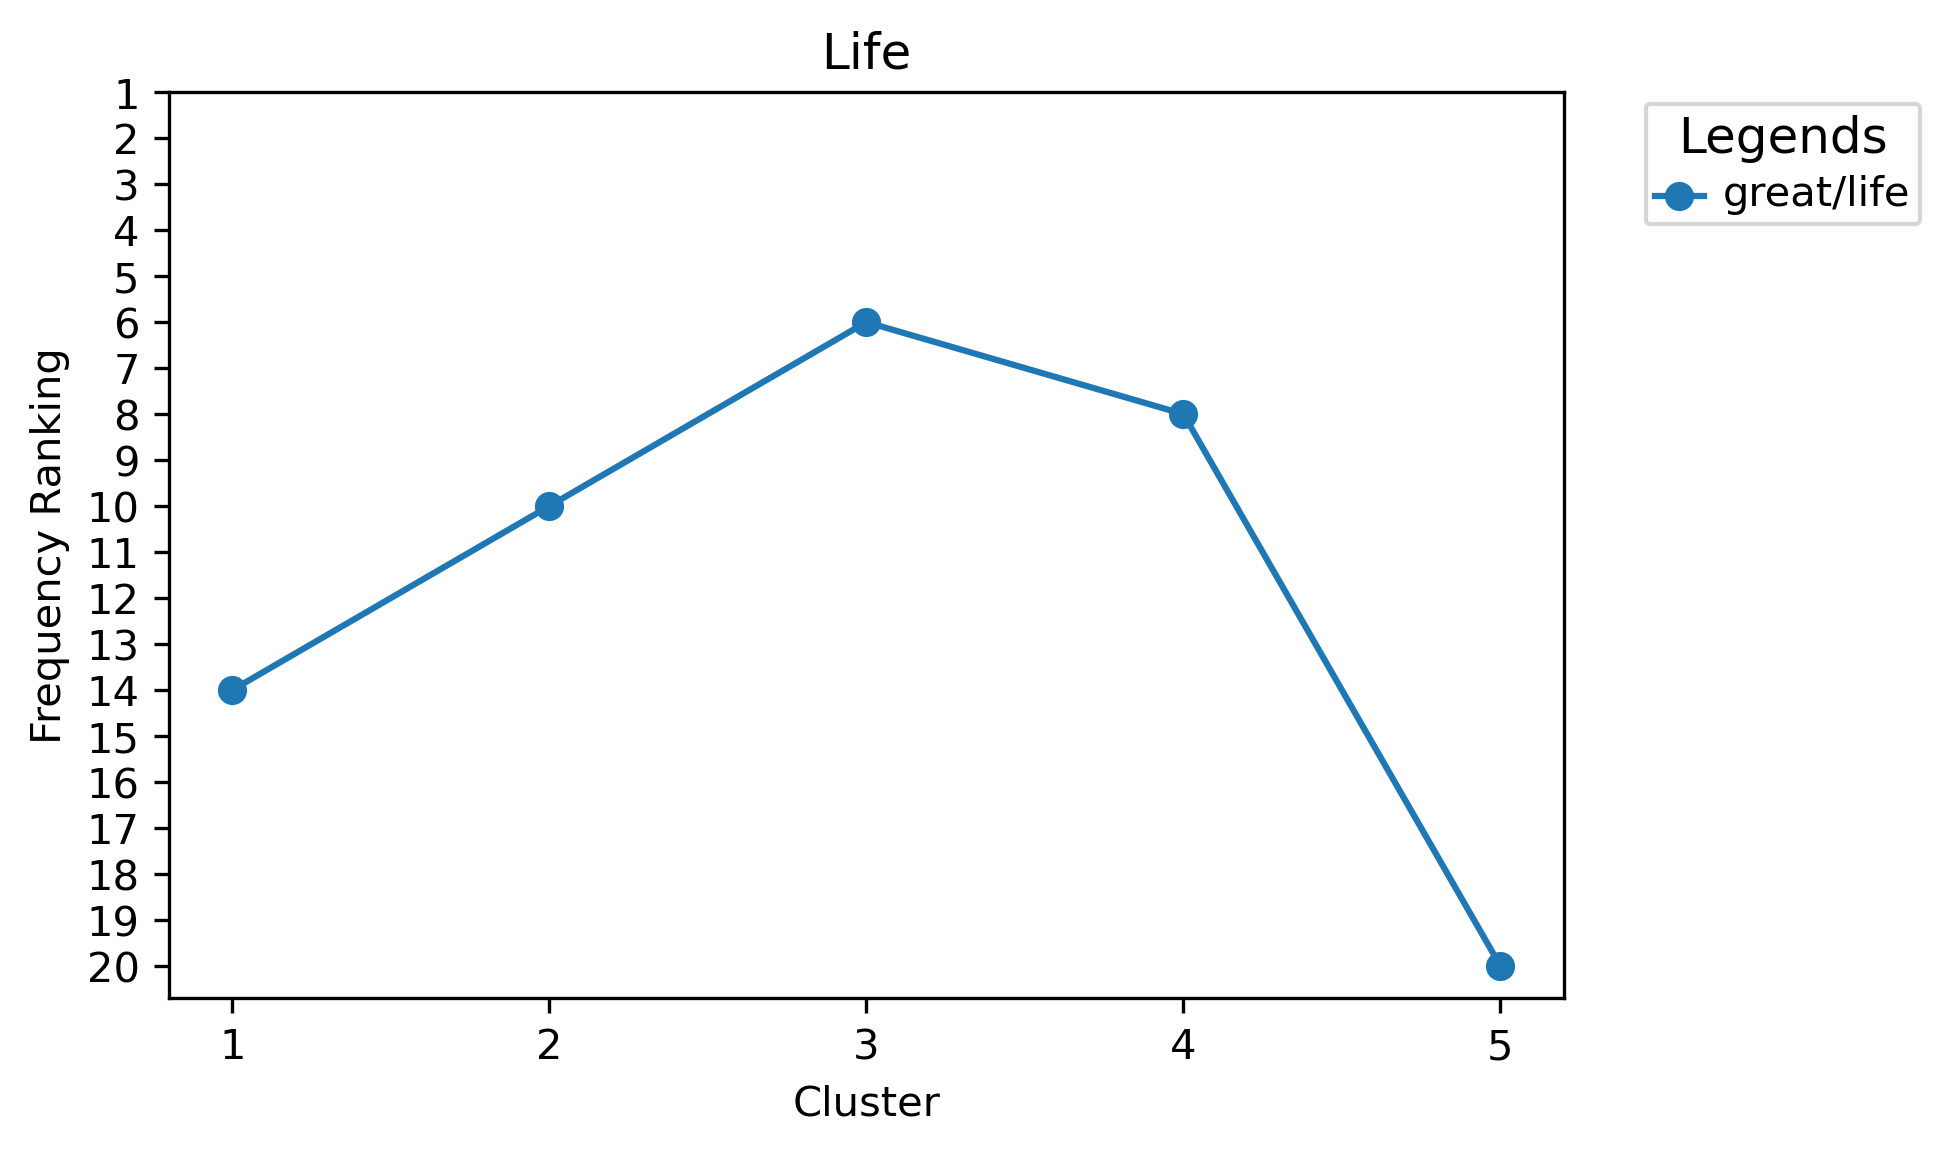

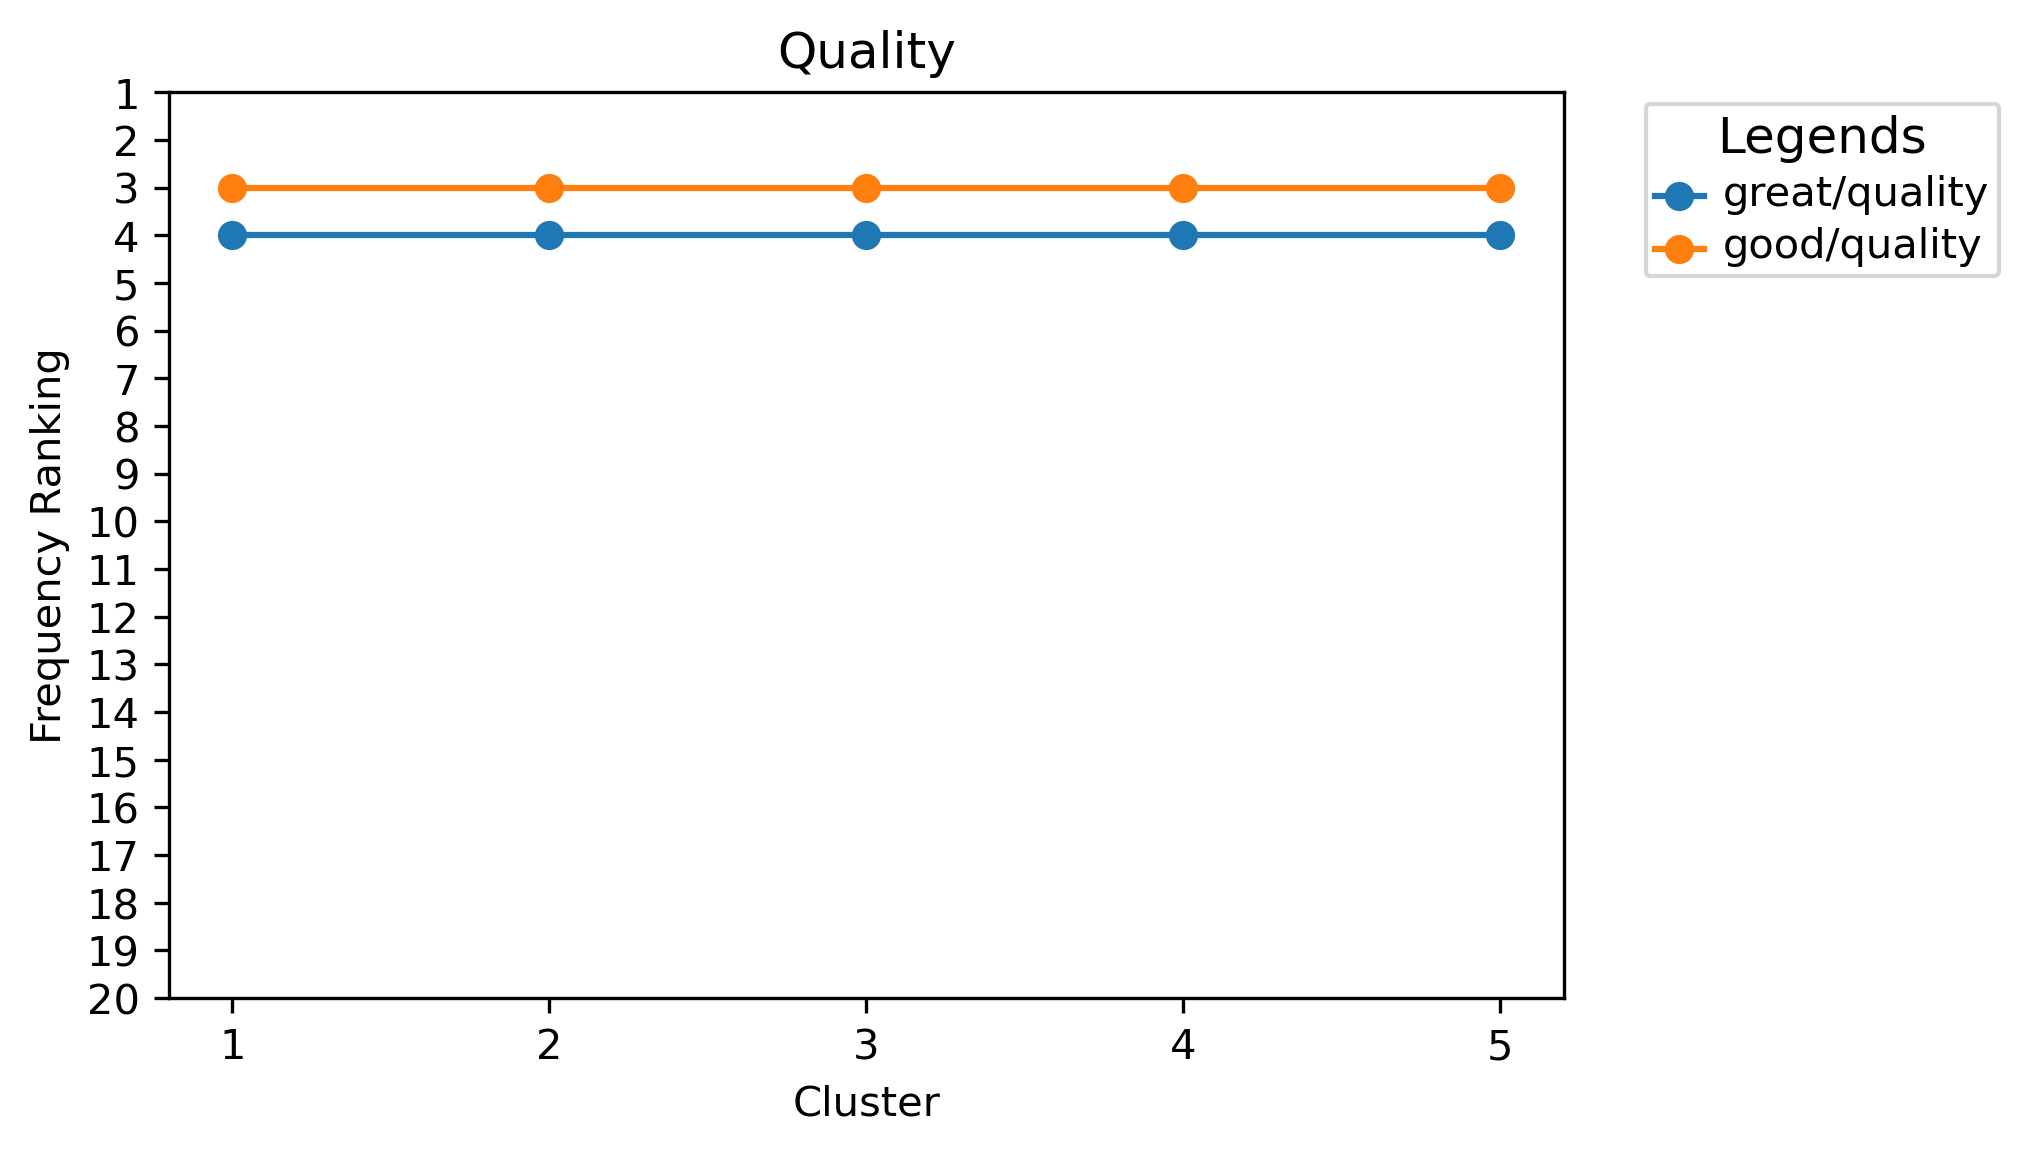

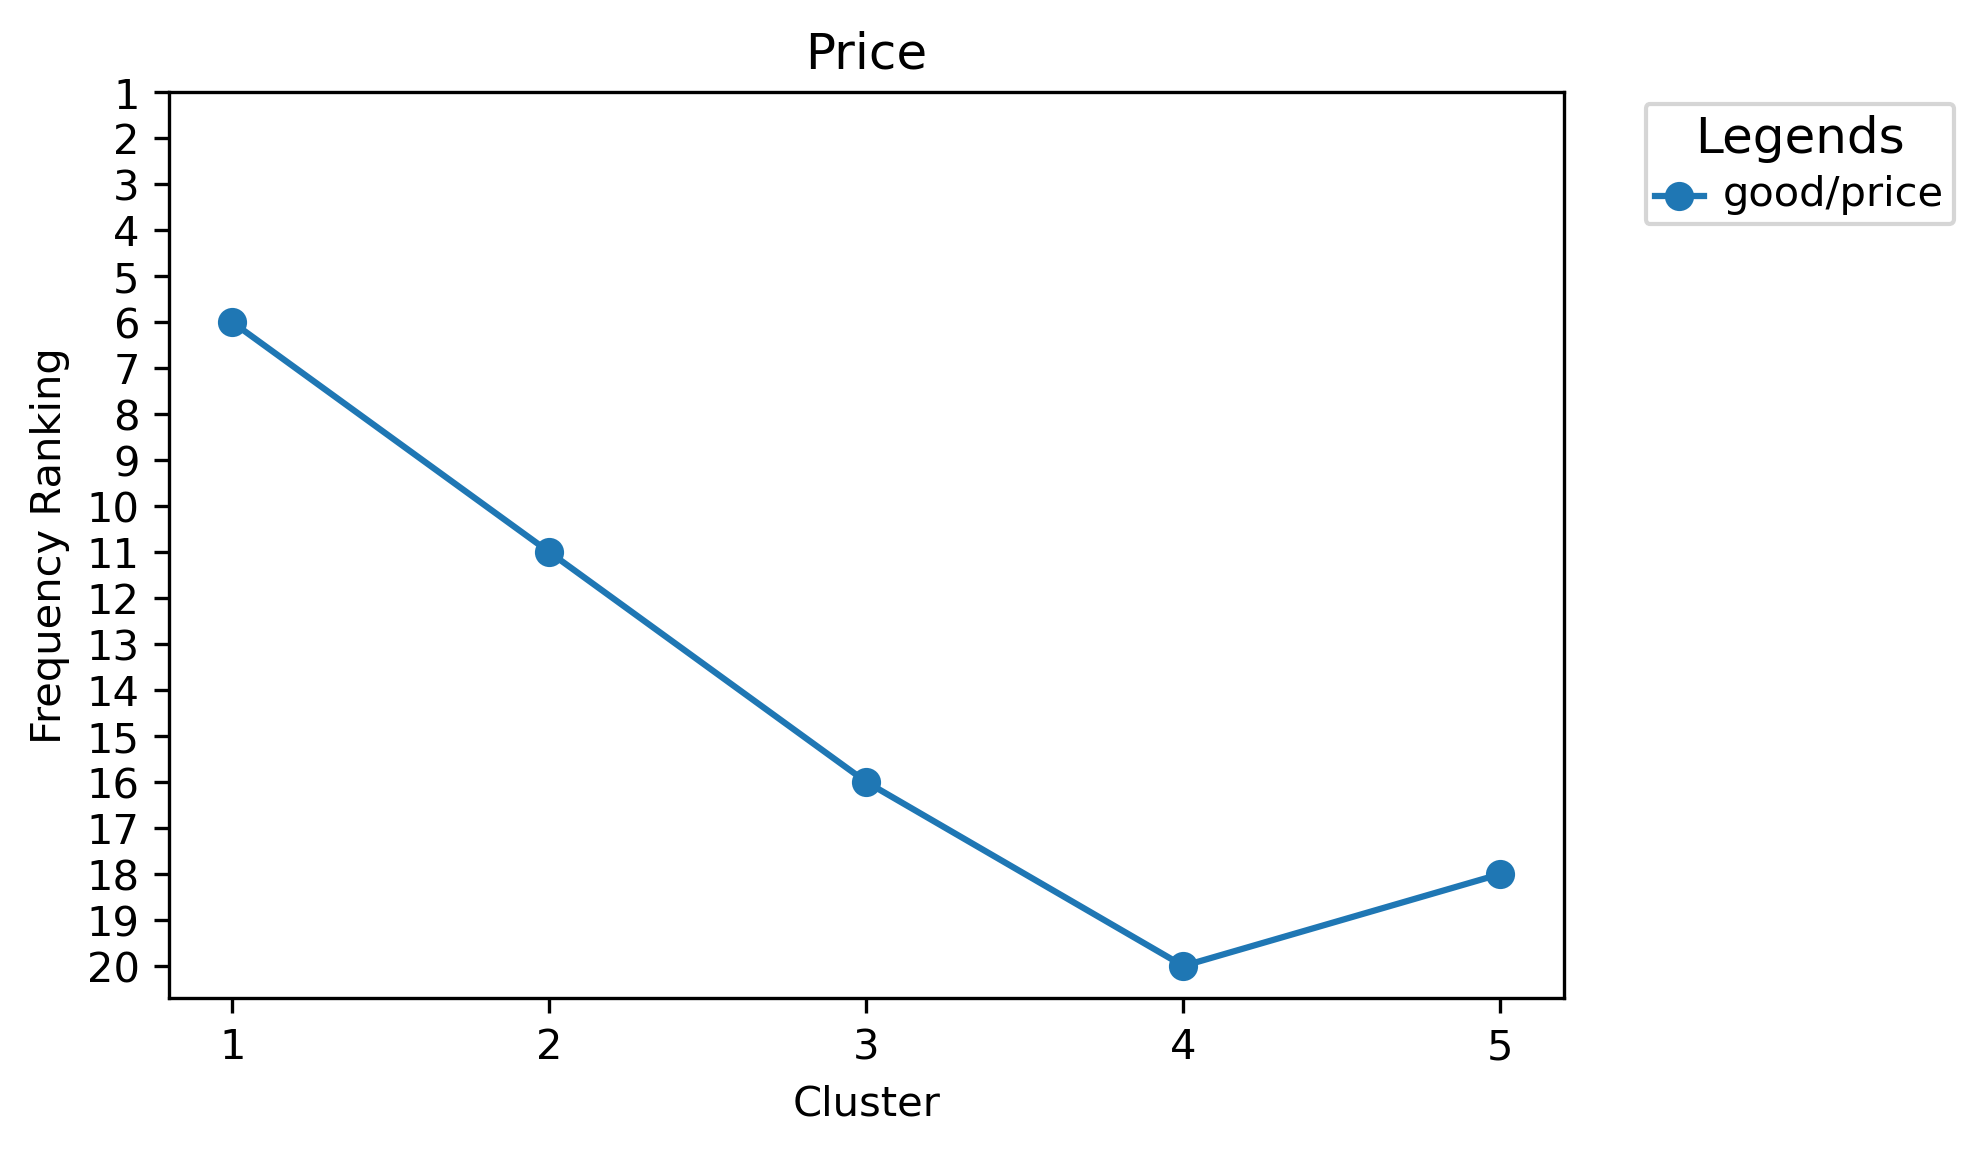

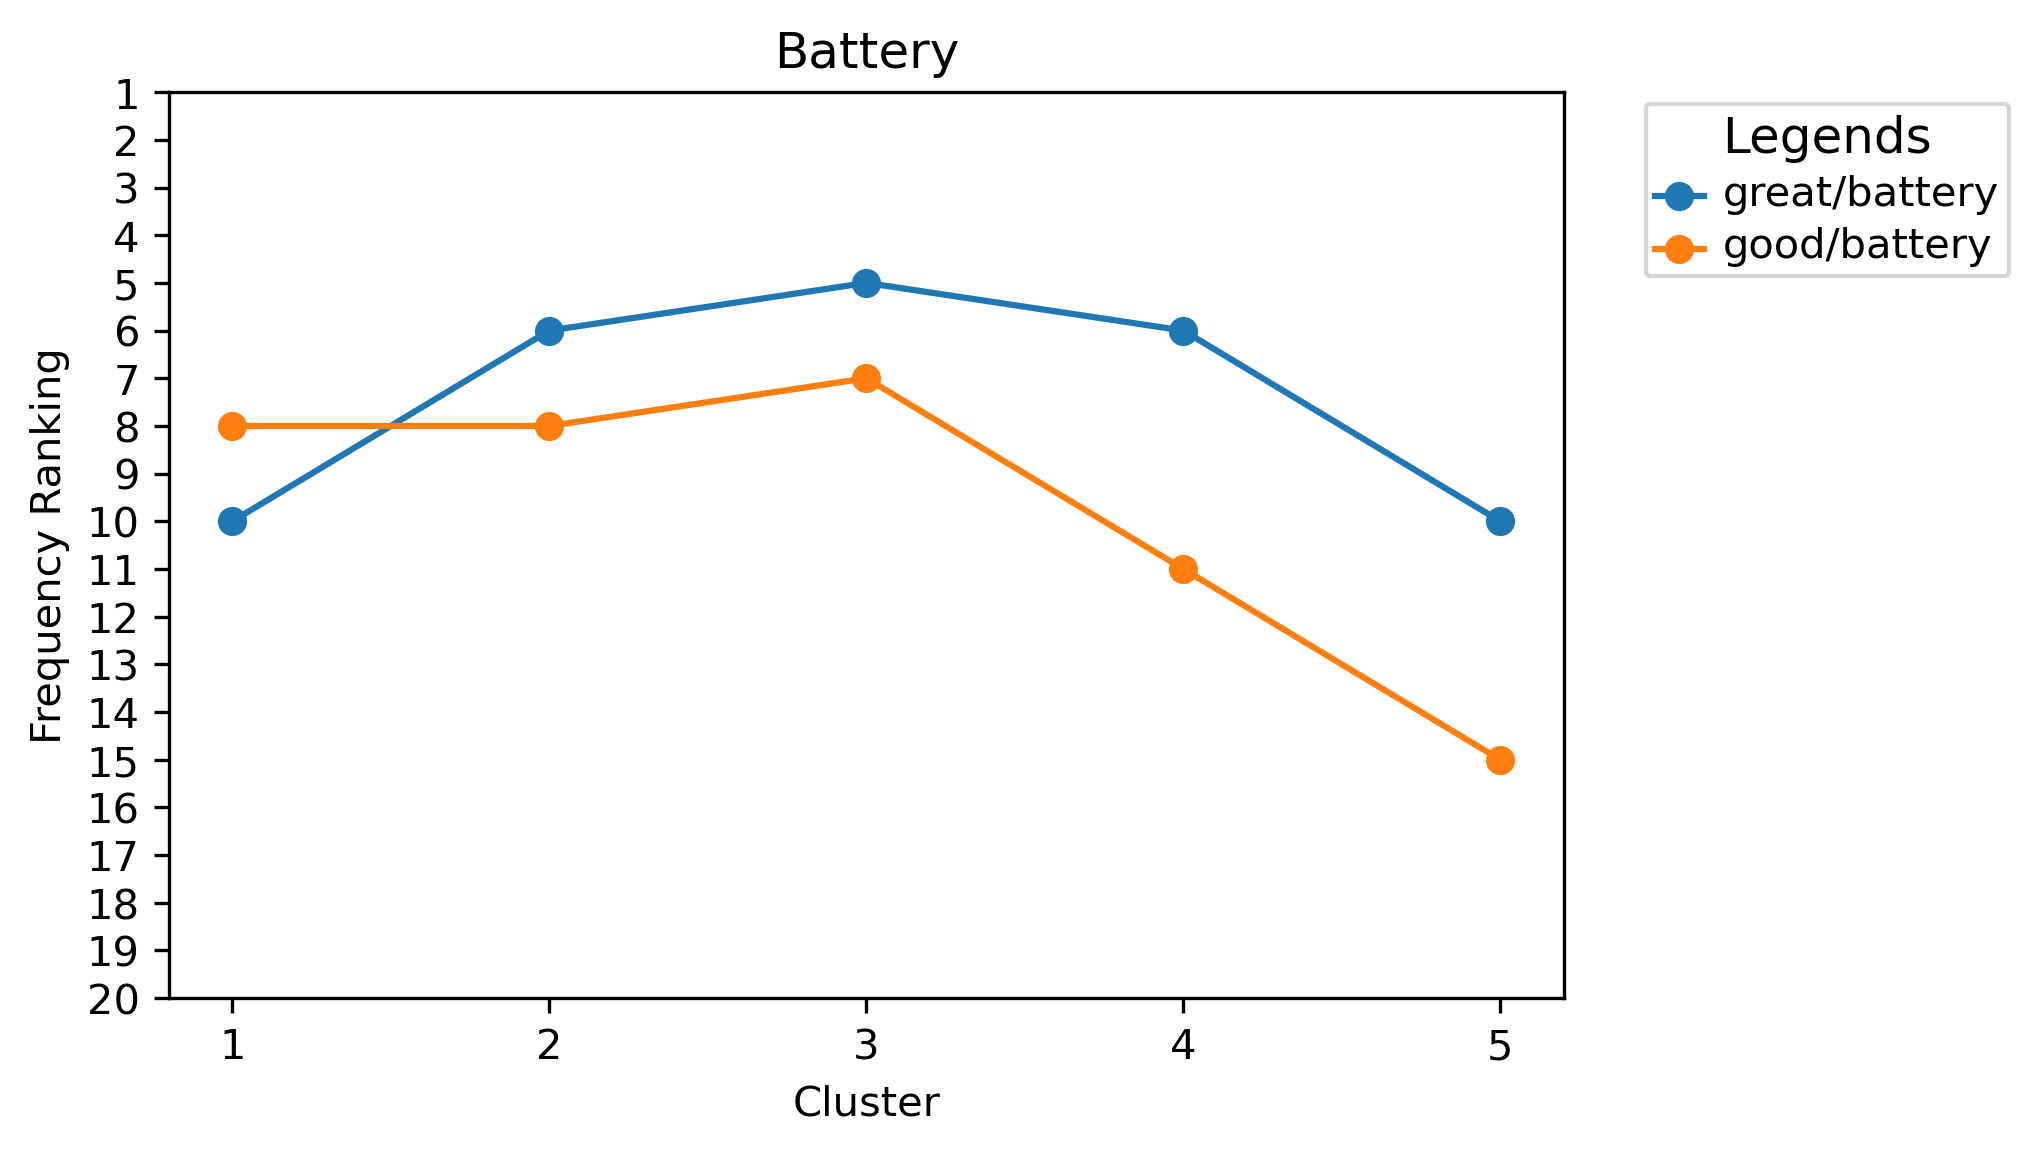

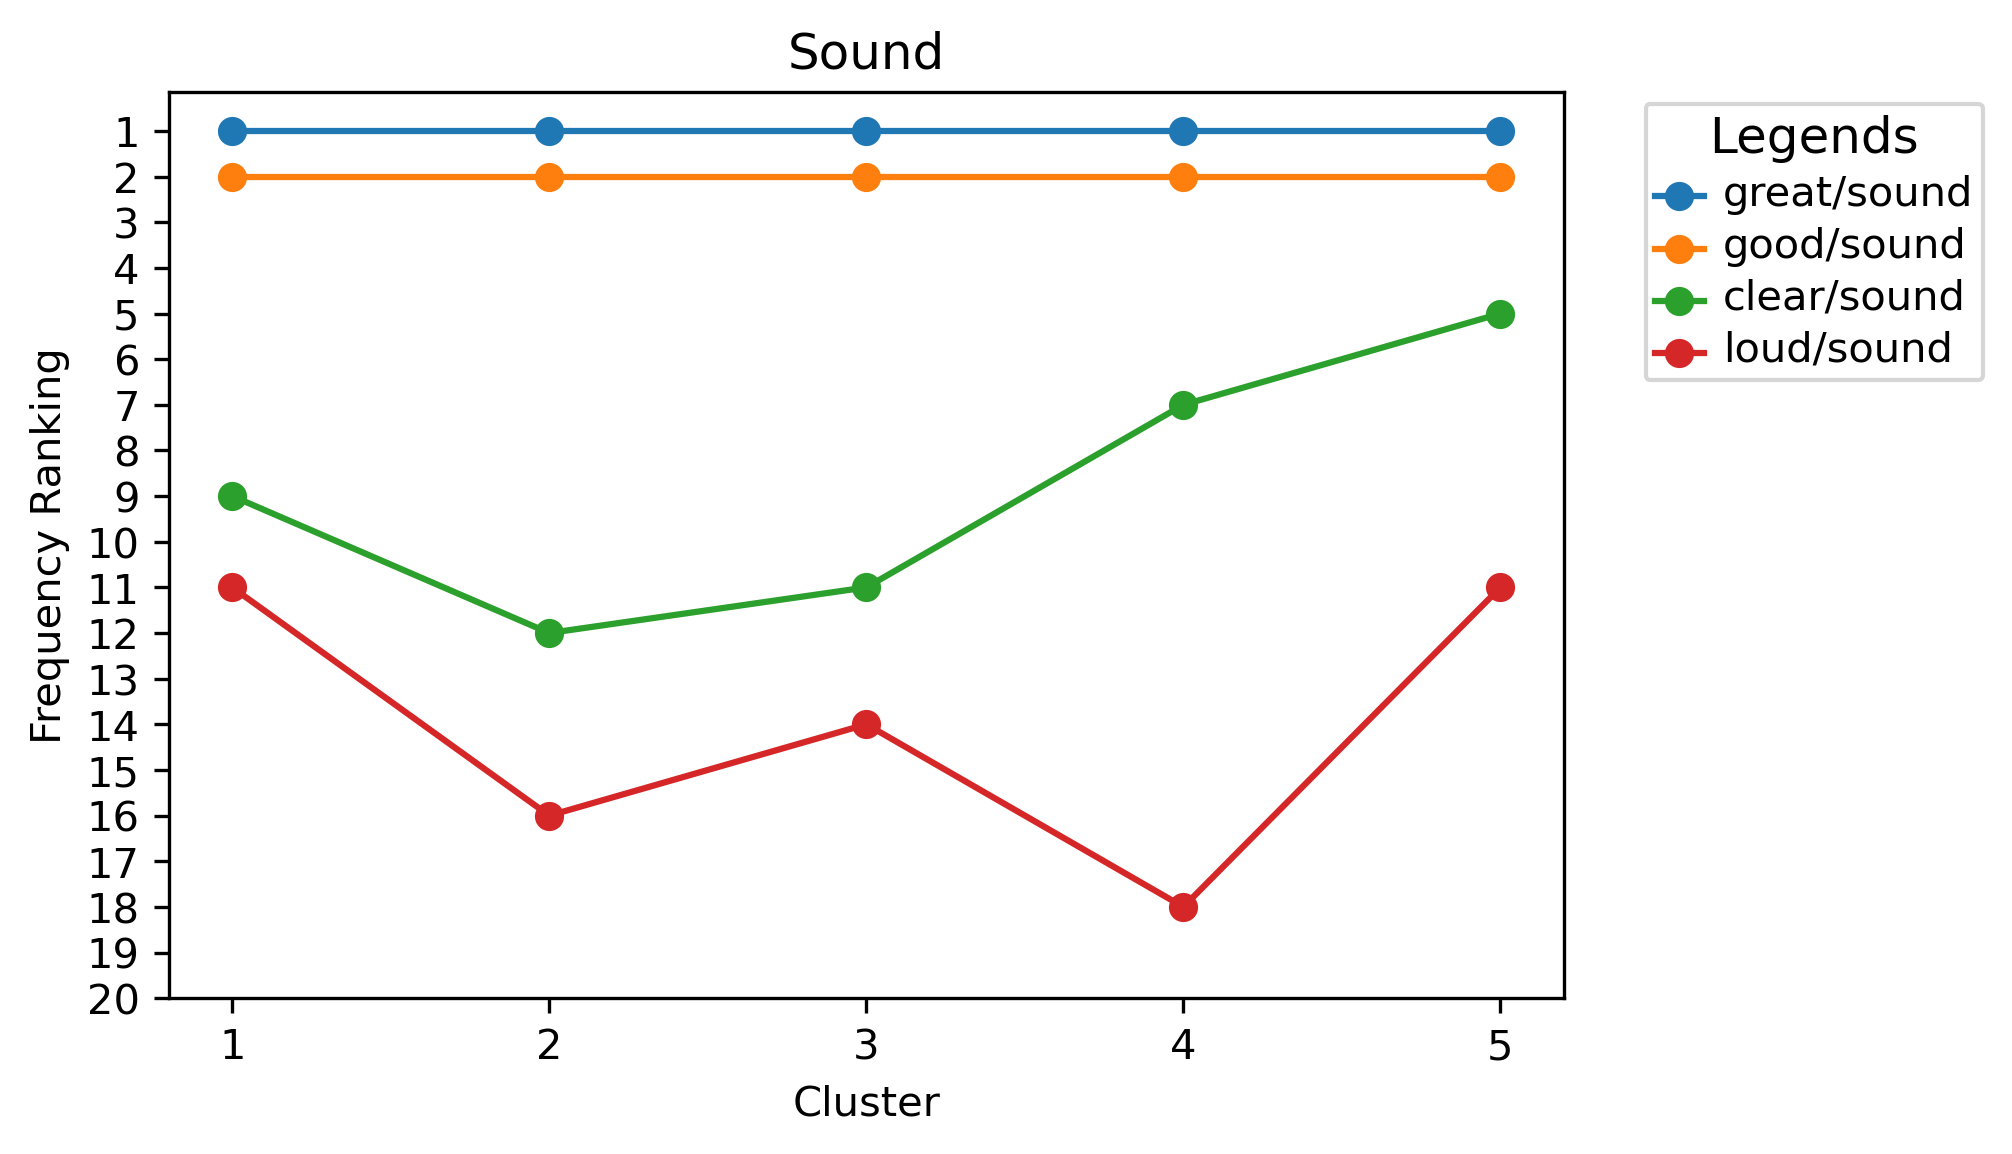

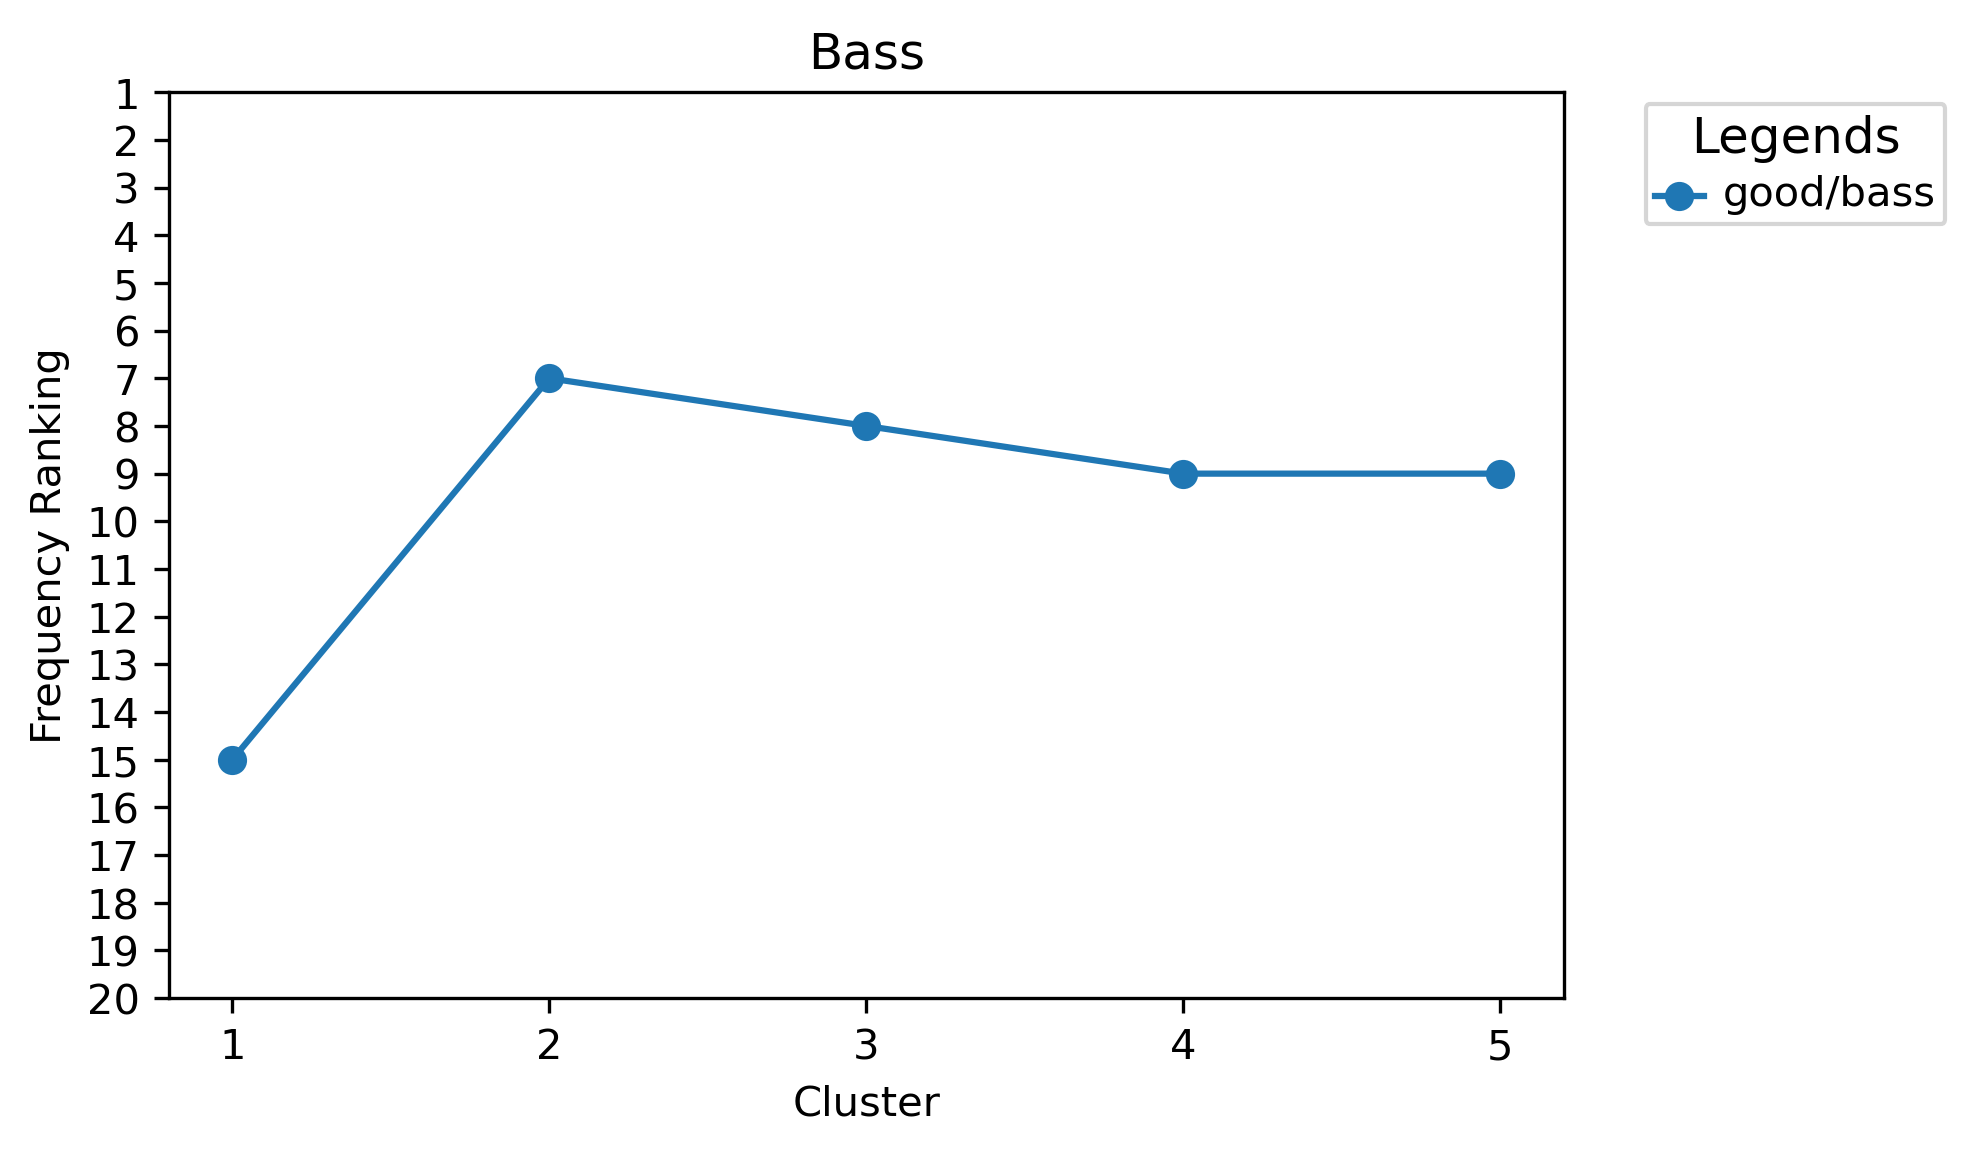

In [10]:
# Positive
print(feat_p_noun)
for i in range(len(feat_p_noun)):
    f = feat_p_noun[i]
    for i in range(len(feat_p)):
        a = feat_p[i]
        if a.rsplit('/', 1)[1] == f:
            x = np.array([1,2,3,4,5])
            y = np.array([df_fr_p[df_fr_p['Feature'] == a]['Rank'].to_string(index=False),
                          df_fr_p[df_fr_p['Feature.1'] == a]['Rank'].to_string(index=False),
                          df_fr_p[df_fr_p['Feature.2'] == a]['Rank'].to_string(index=False),
                          df_fr_p[df_fr_p['Feature.3'] == a]['Rank'].to_string(index=False),
                          df_fr_p[df_fr_p['Feature.4'] == a]['Rank'].to_string(index=False)])
            for b, word in enumerate(y):
                if word == 'Series([], )':
                    y[b] = 'nan'
            y = y.astype(float)

            plt.plot(x, y, 'o-', label=a)
            plt.xticks(x)
            plt.yticks(np.arange(1,21,1))
            legend = plt.legend(title='Legends', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
            legend.get_title().set_fontsize('12') #legend 'Title' fontsize
            plt.setp(plt.gca().get_legend().get_texts(), fontsize='10') #legend 'List' fontsize

    plt.figure
    plt.title(f.capitalize())
    plt.xlabel('Cluster')
    plt.ylabel('Frequency Ranking')
    plt.gca().invert_yaxis()
    plt.savefig("fr_p_" + str(f) + ".png", format="png", dpi=300, bbox_inches = "tight")    
    plt.show()

['quality', 'battery', 'volume']


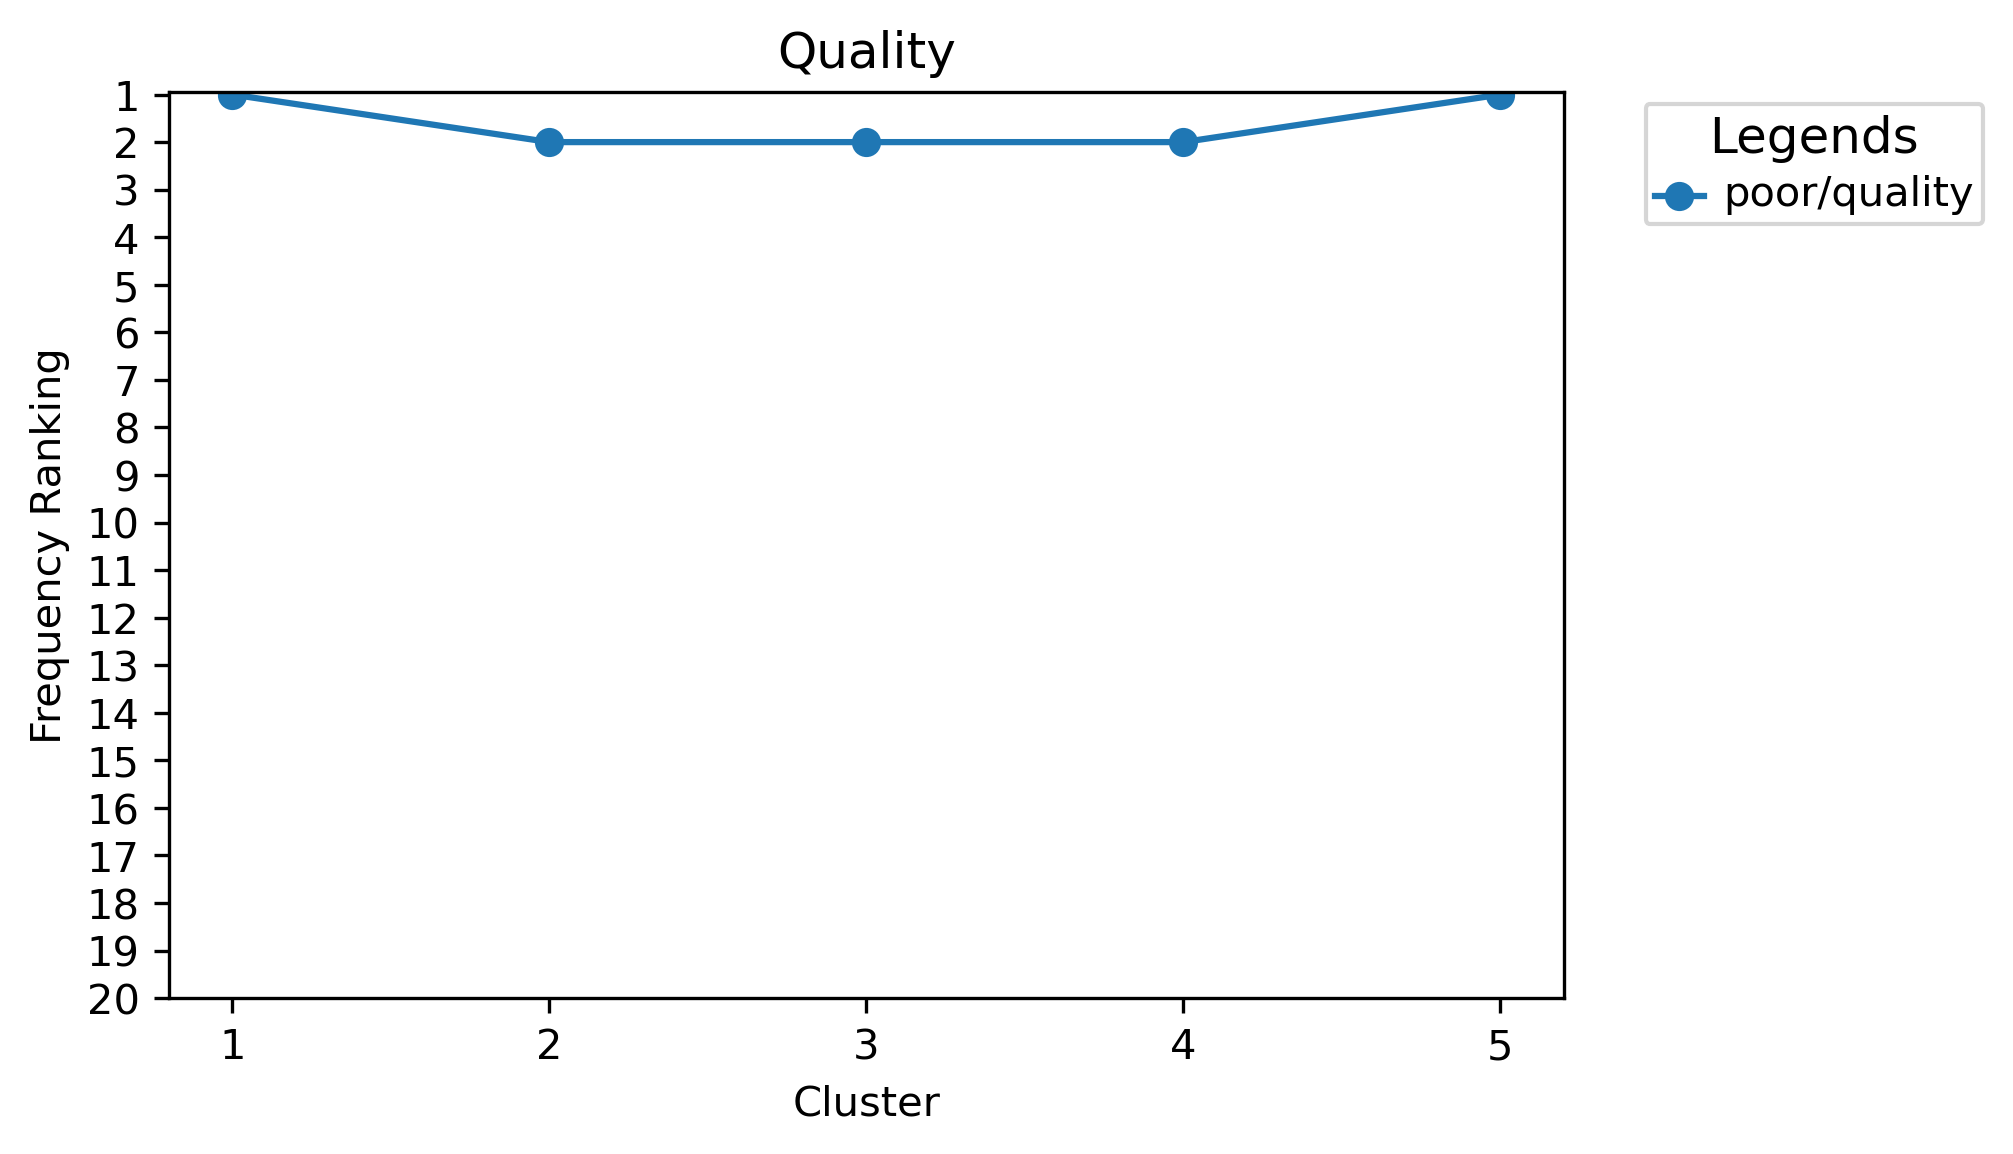

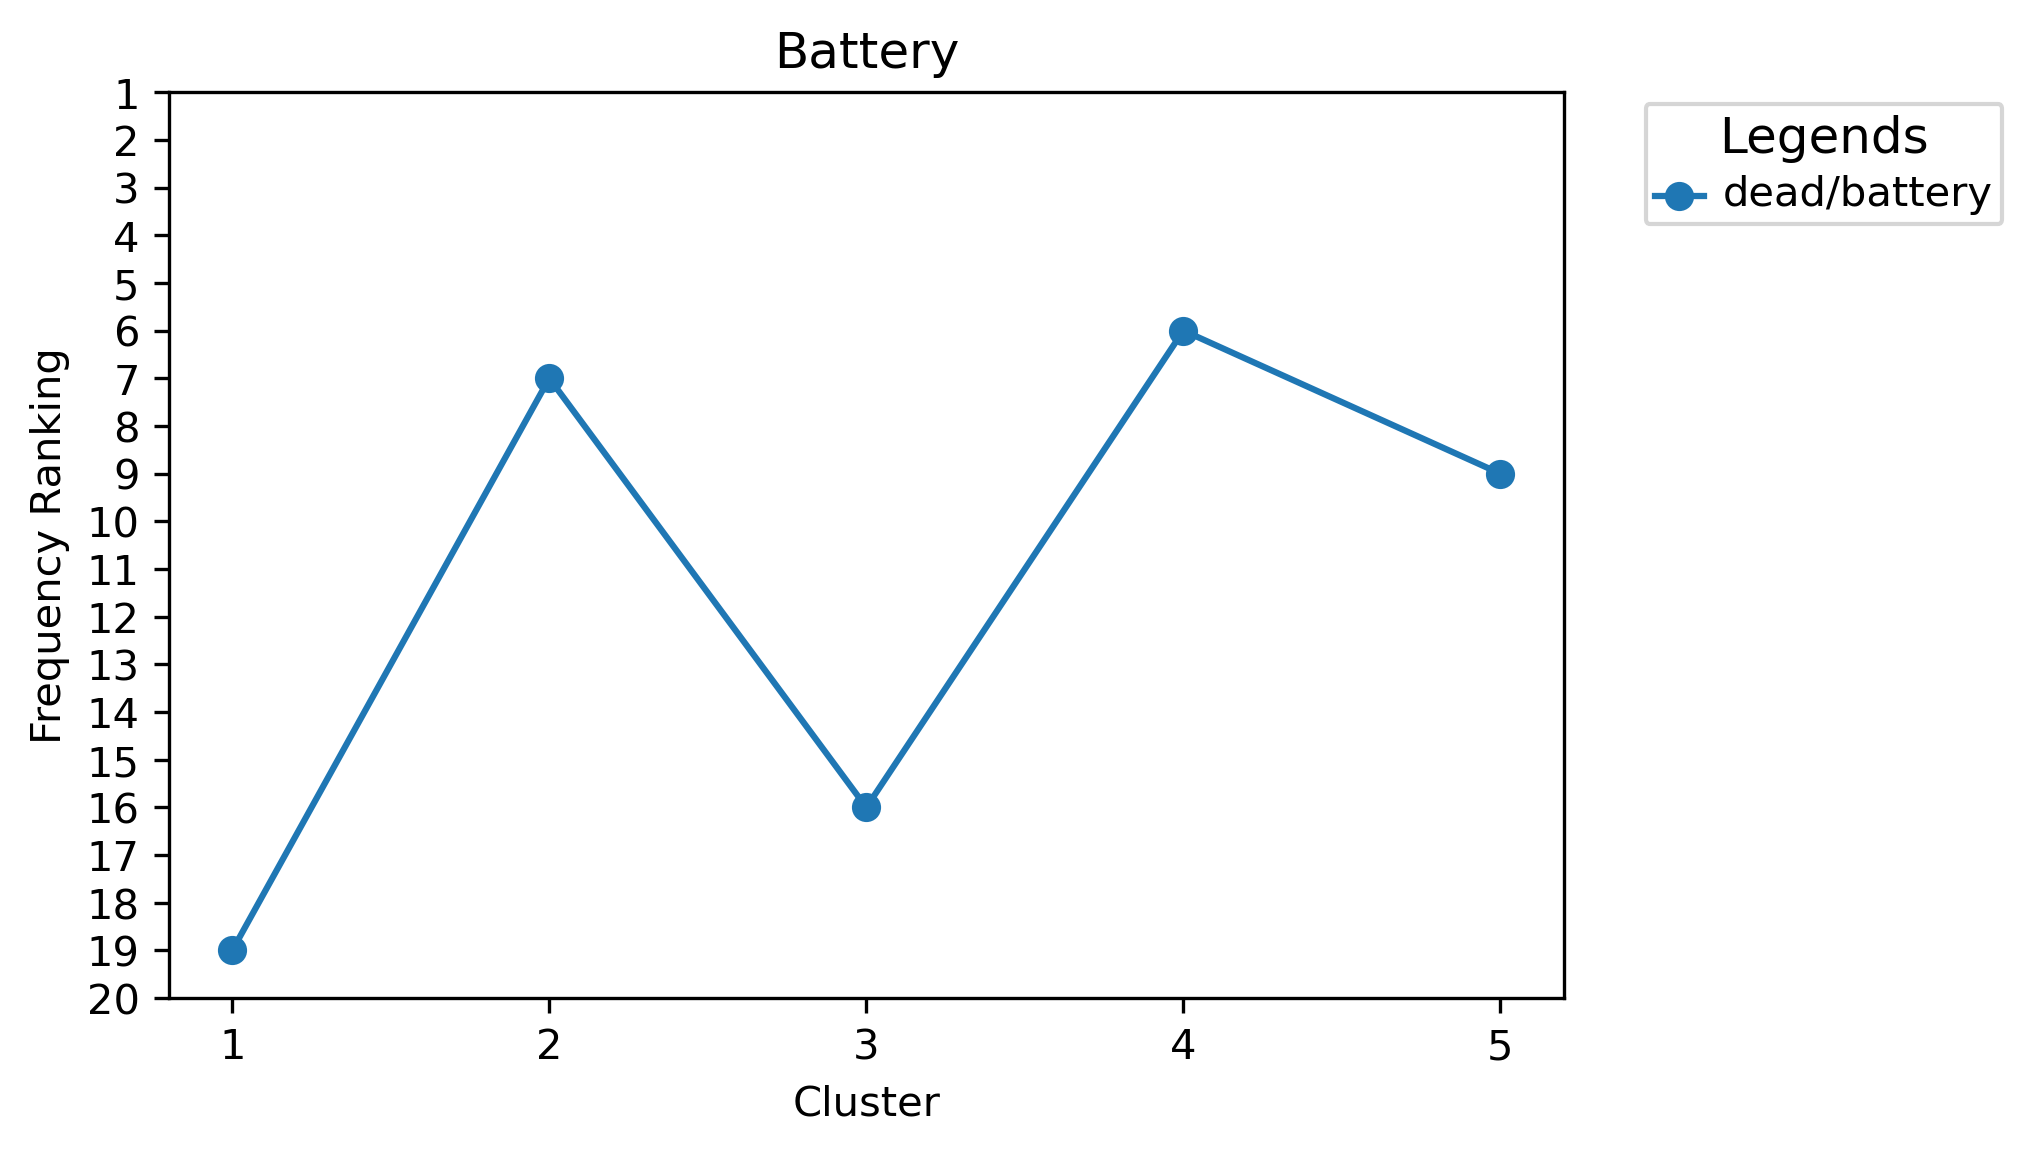

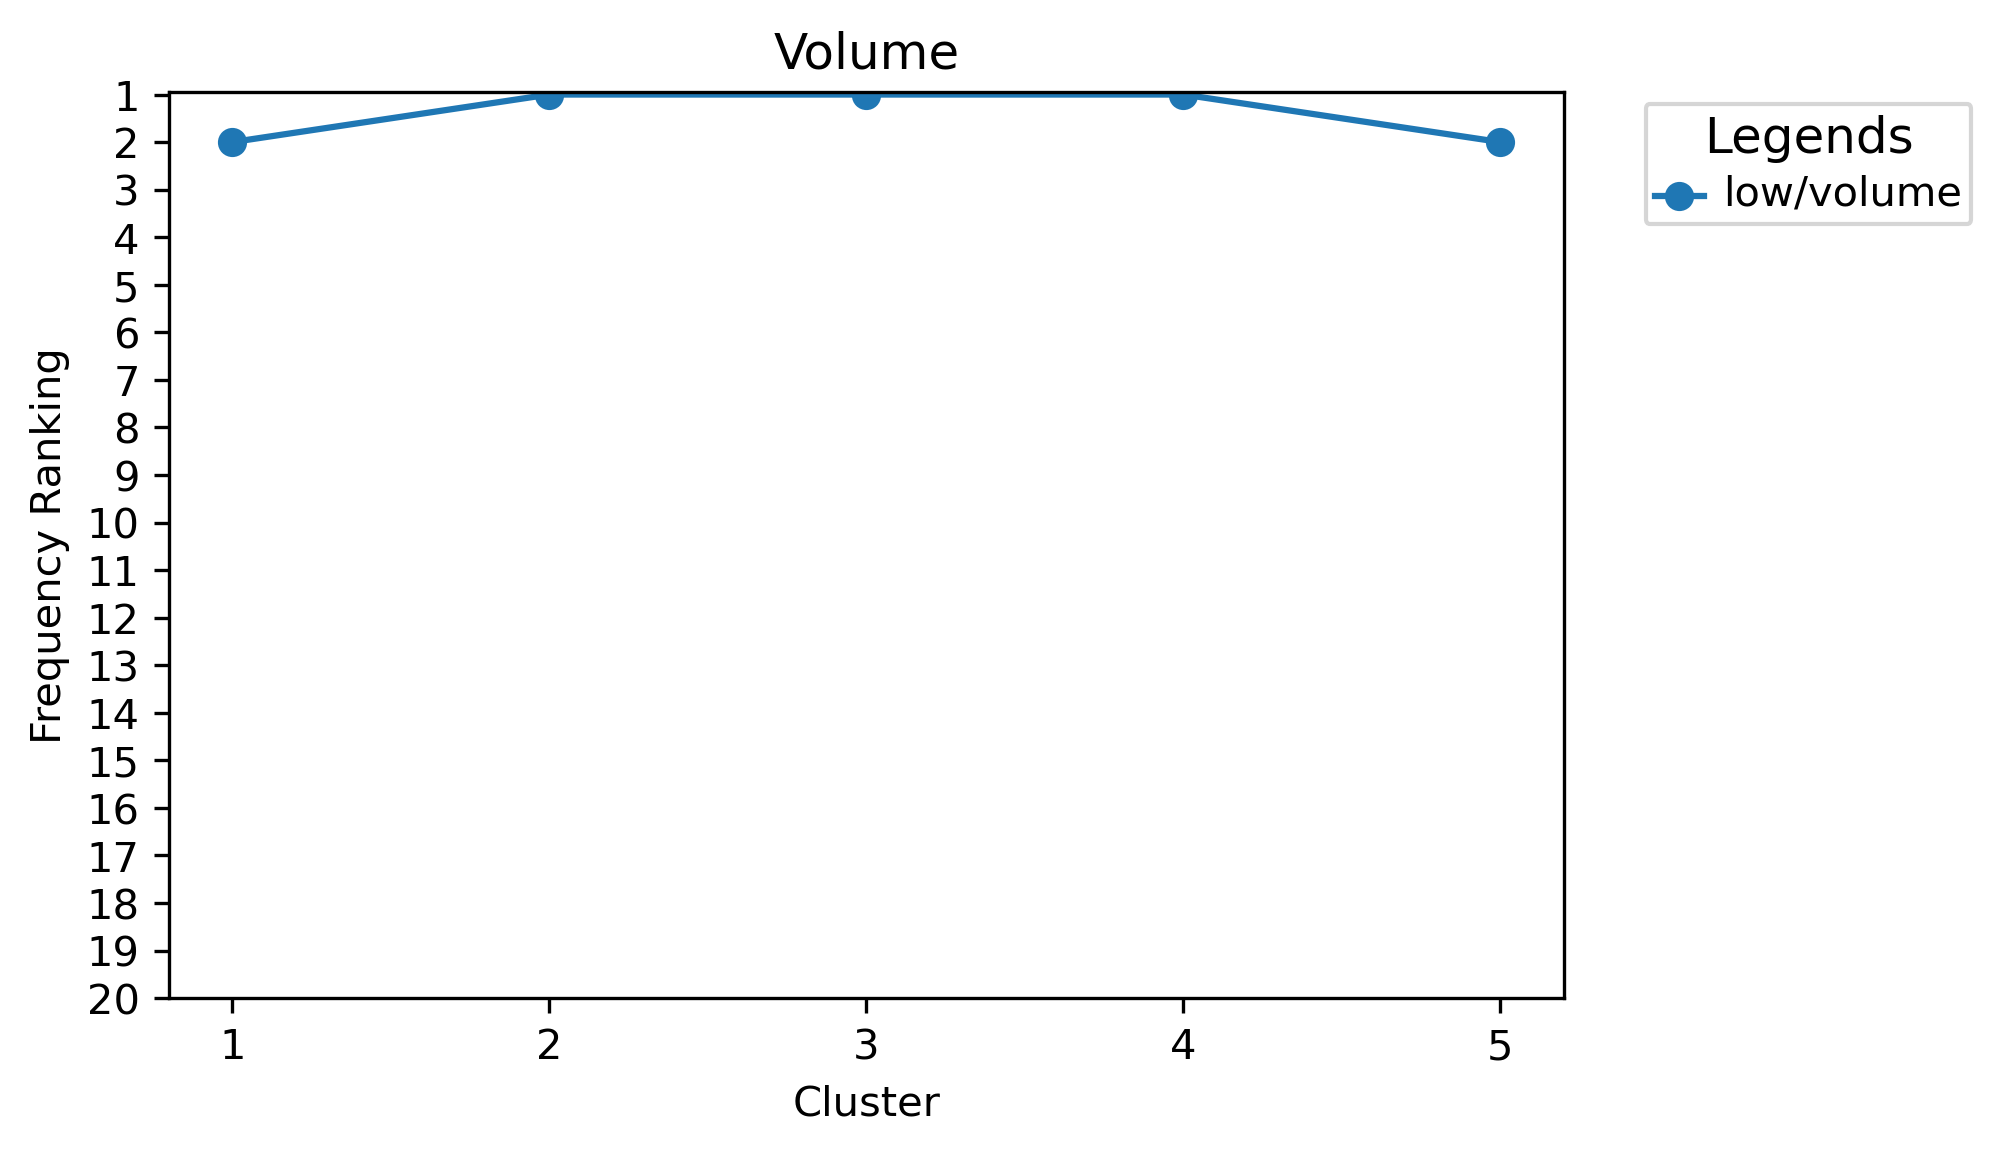

In [11]:
# Negative
print(feat_n_noun)
for i in range(len(feat_n_noun)):
    f = feat_n_noun[i]
    for i in range(len(feat_n)):
        a = feat_n[i]
        if a.rsplit('/', 1)[1] == f:
            x = np.array([1,2,3,4,5])
            y = np.array([df_fr_n[df_fr_n['Feature'] == a]['Rank'].to_string(index=False),
                          df_fr_n[df_fr_n['Feature.1'] == a]['Rank'].to_string(index=False),
                          df_fr_n[df_fr_n['Feature.2'] == a]['Rank'].to_string(index=False),
                          df_fr_n[df_fr_n['Feature.3'] == a]['Rank'].to_string(index=False),
                          df_fr_n[df_fr_n['Feature.4'] == a]['Rank'].to_string(index=False)])
            for b, word in enumerate(y):
                if word == 'Series([], )':
                    y[b] = 'nan'
            y = y.astype(float)

            plt.plot(x, y, 'o-', label=a)
            plt.xticks(x)
            plt.yticks(np.arange(1,21,1))
            legend = plt.legend(title='Legends', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
            legend.get_title().set_fontsize('12') #legend 'Title' fontsize
            plt.setp(plt.gca().get_legend().get_texts(), fontsize='10') #legend 'List' fontsize

    plt.figure
    plt.title(f.capitalize())
    plt.xlabel('Cluster')
    plt.ylabel('Frequency Ranking')
    plt.gca().invert_yaxis()
    plt.savefig("fr_n_" + str(f) + ".png", format="png", dpi=300, bbox_inches = "tight")    
    plt.show()

### Strength

['life', 'quality', 'price', 'battery', 'sound', 'bass']


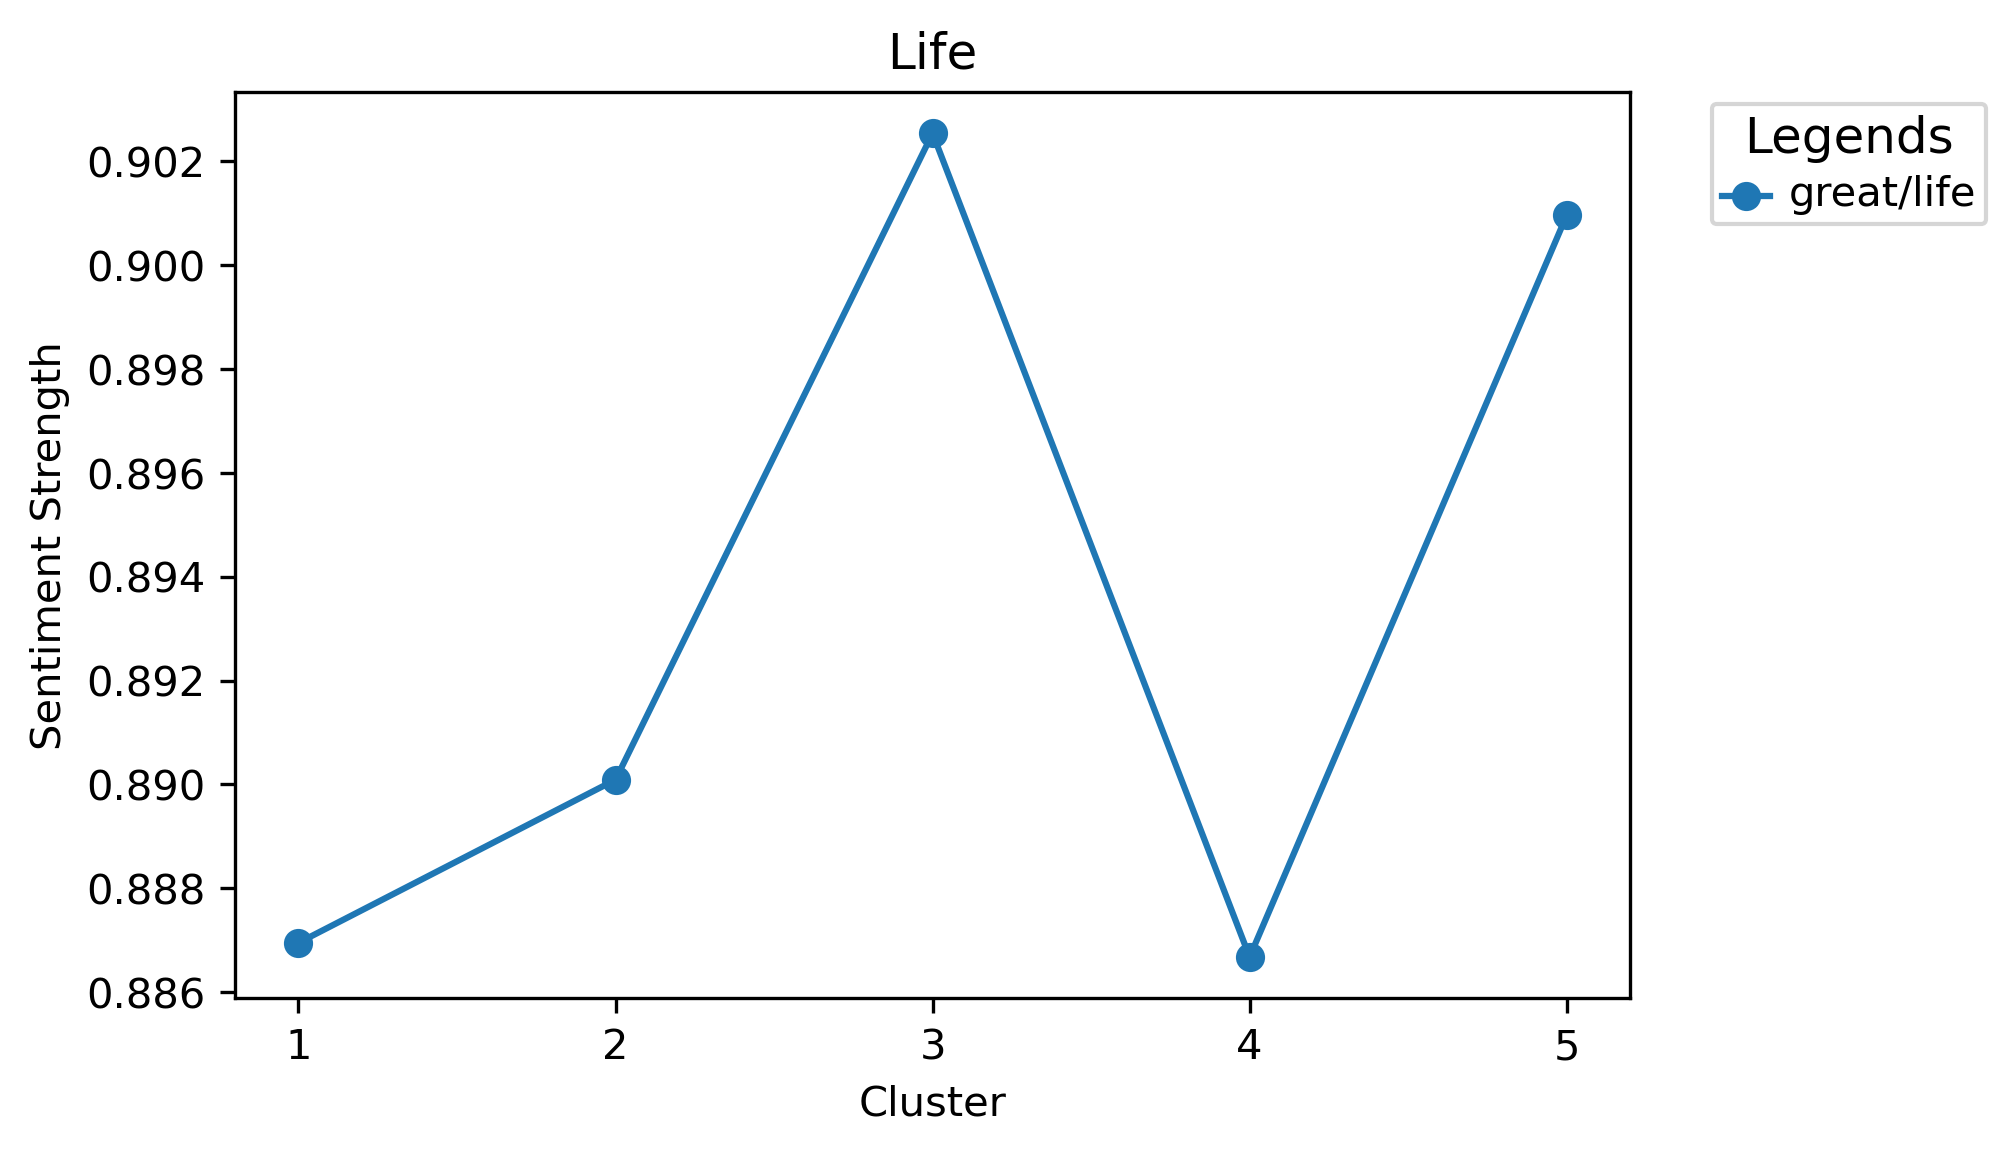

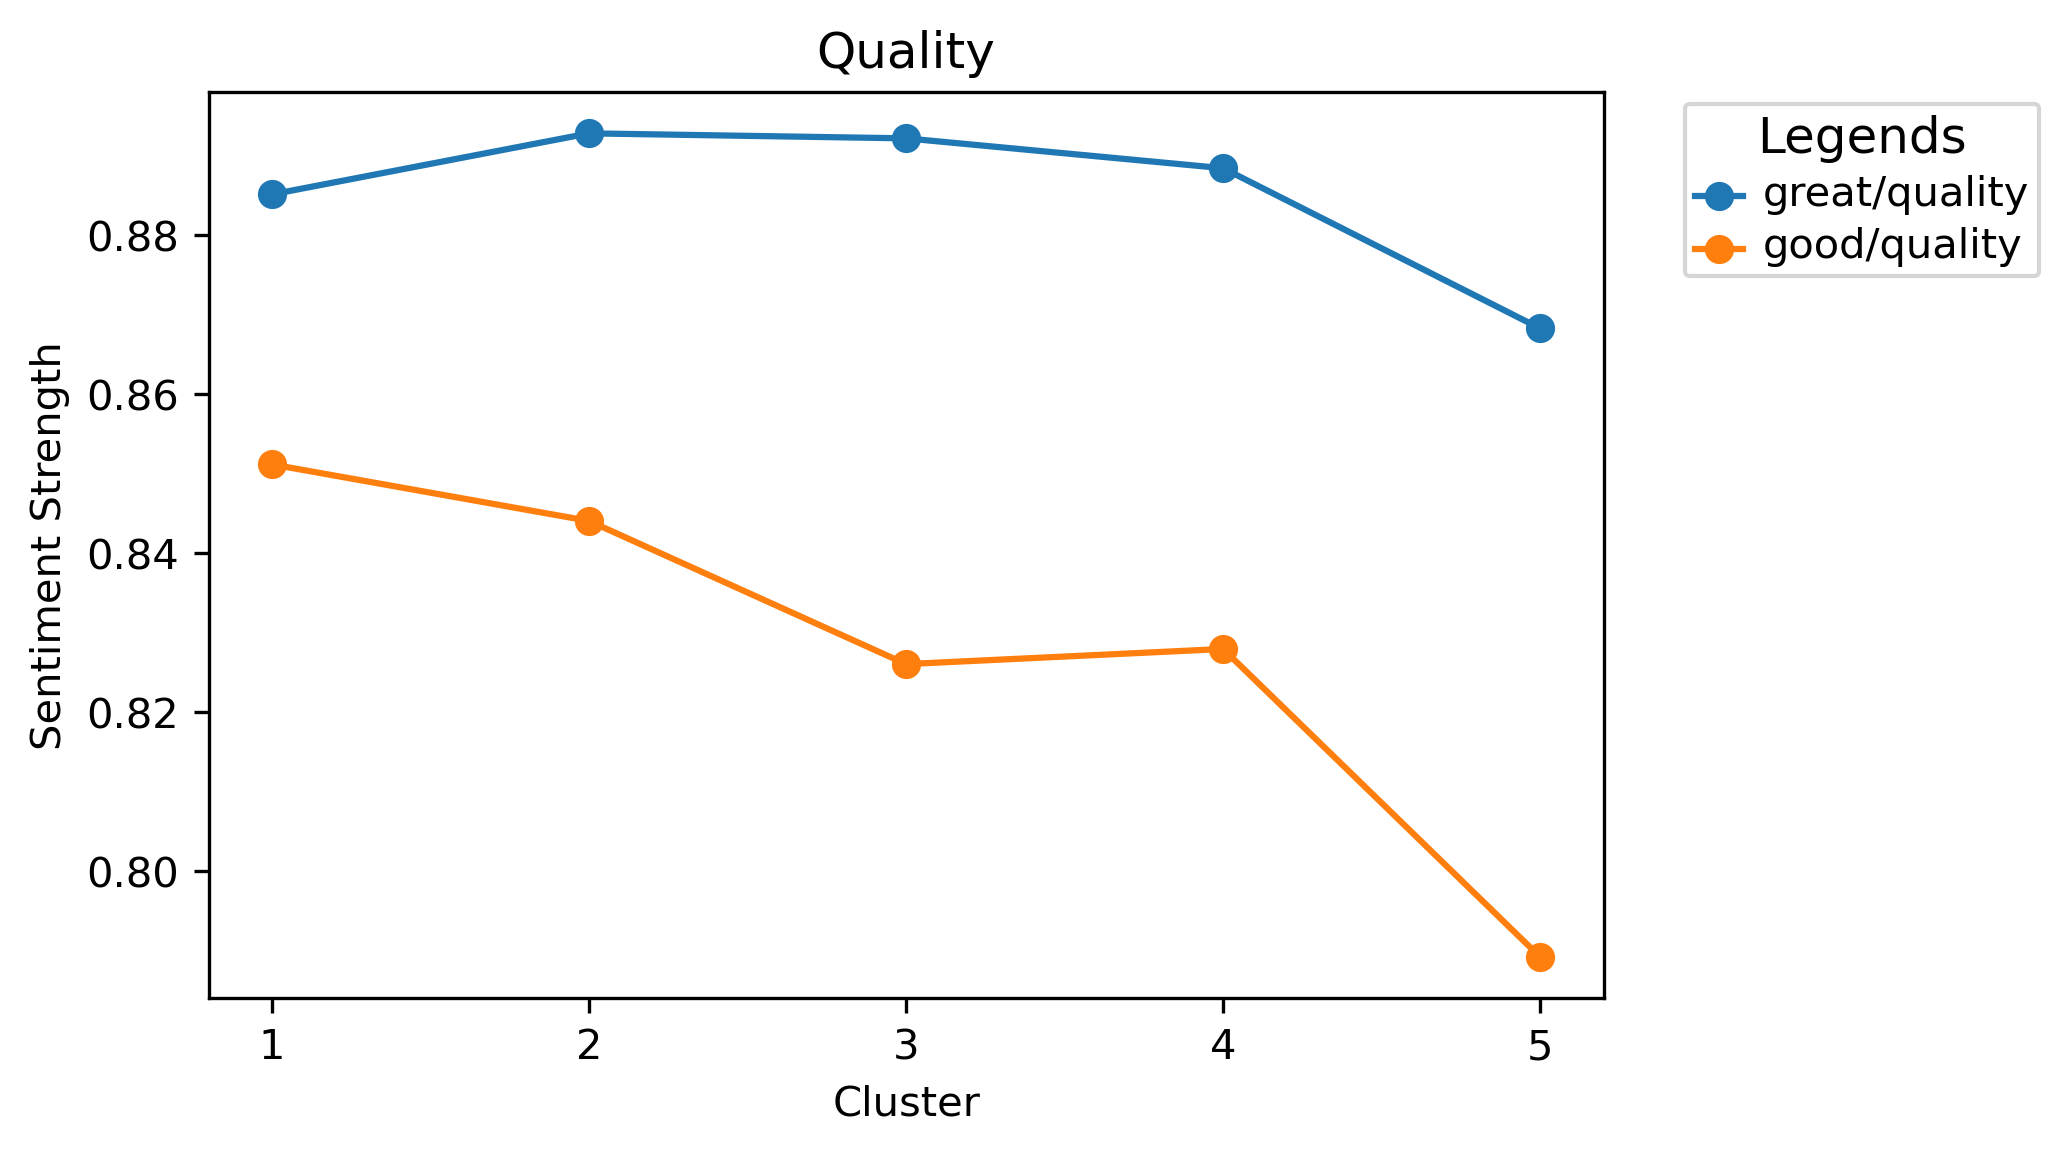

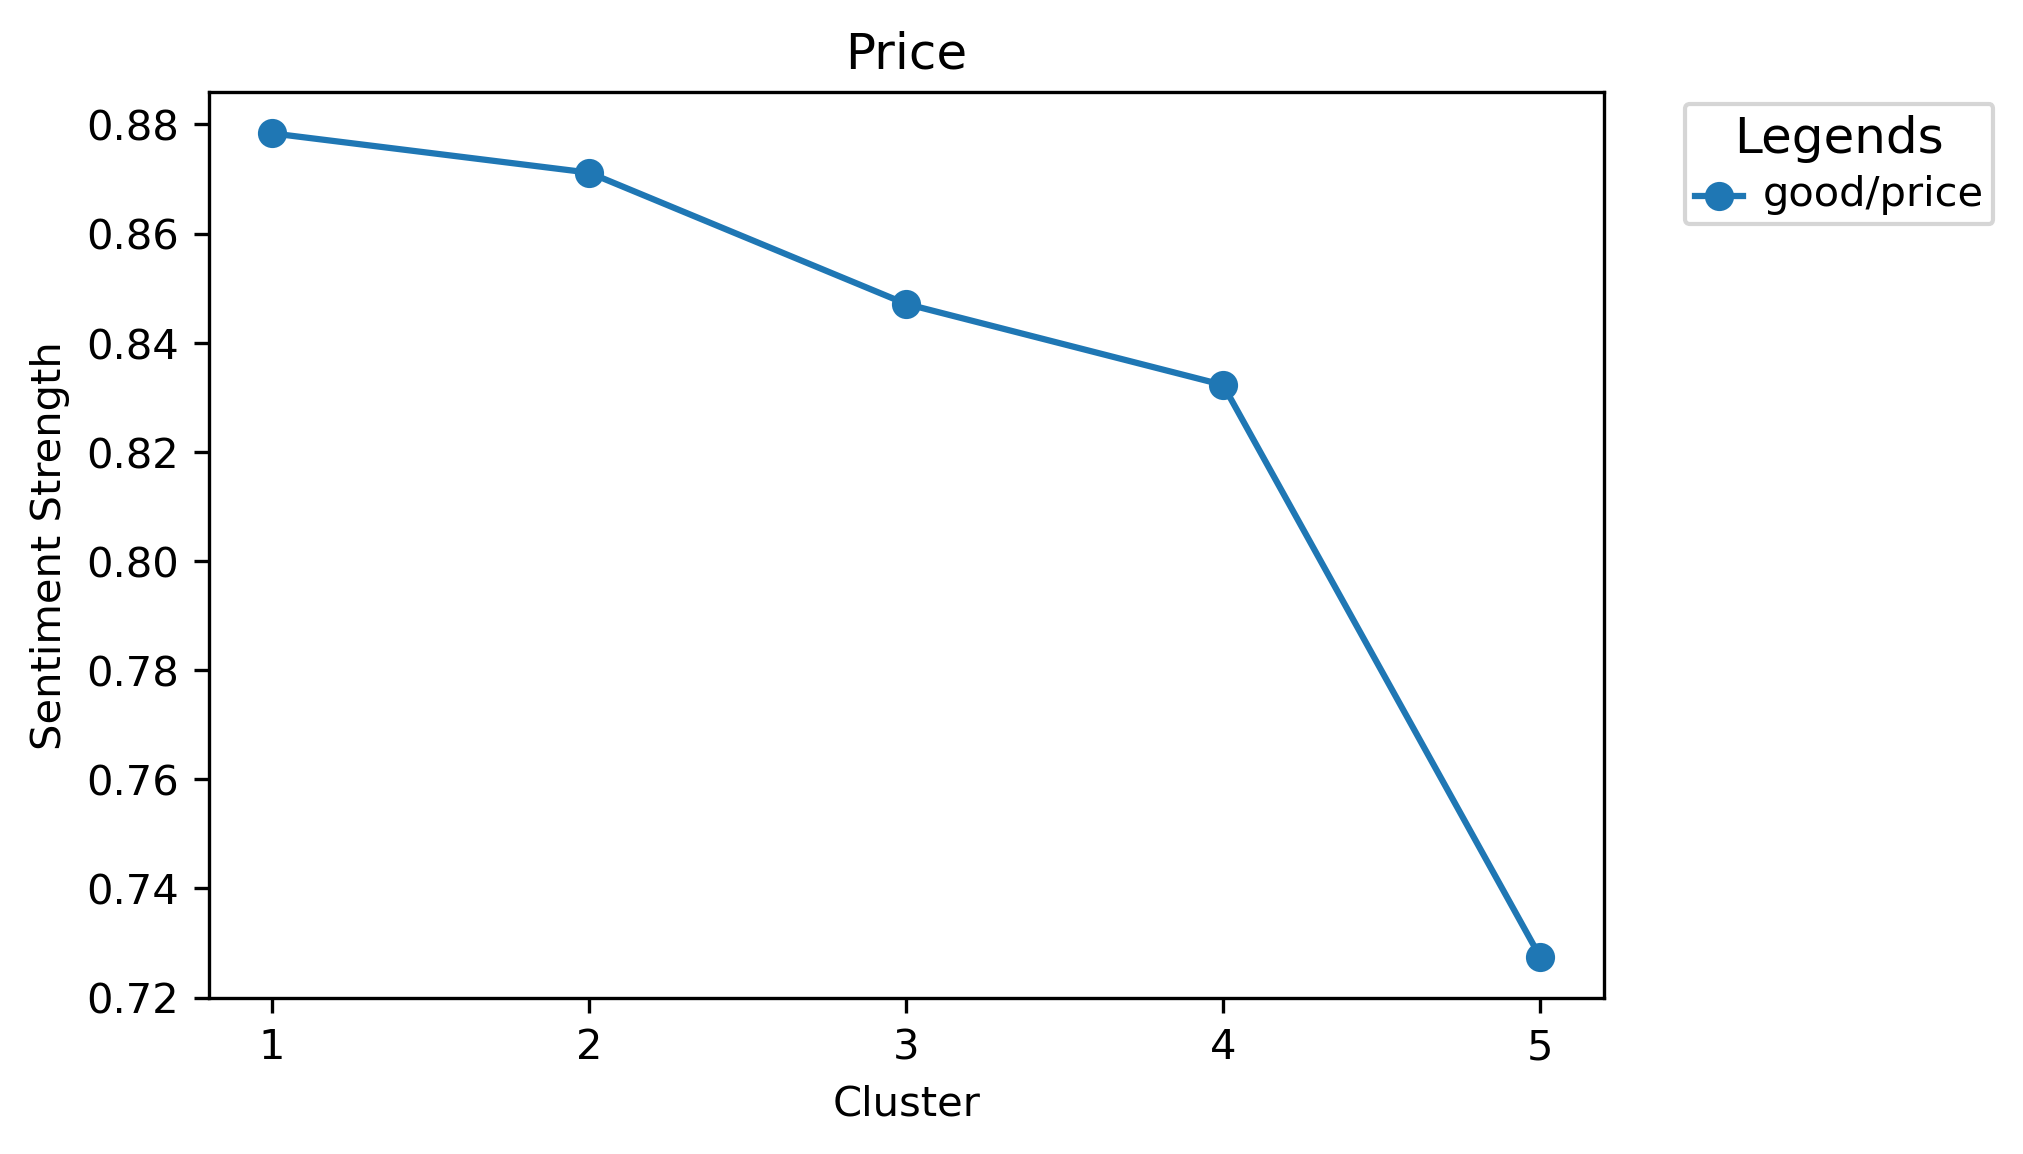

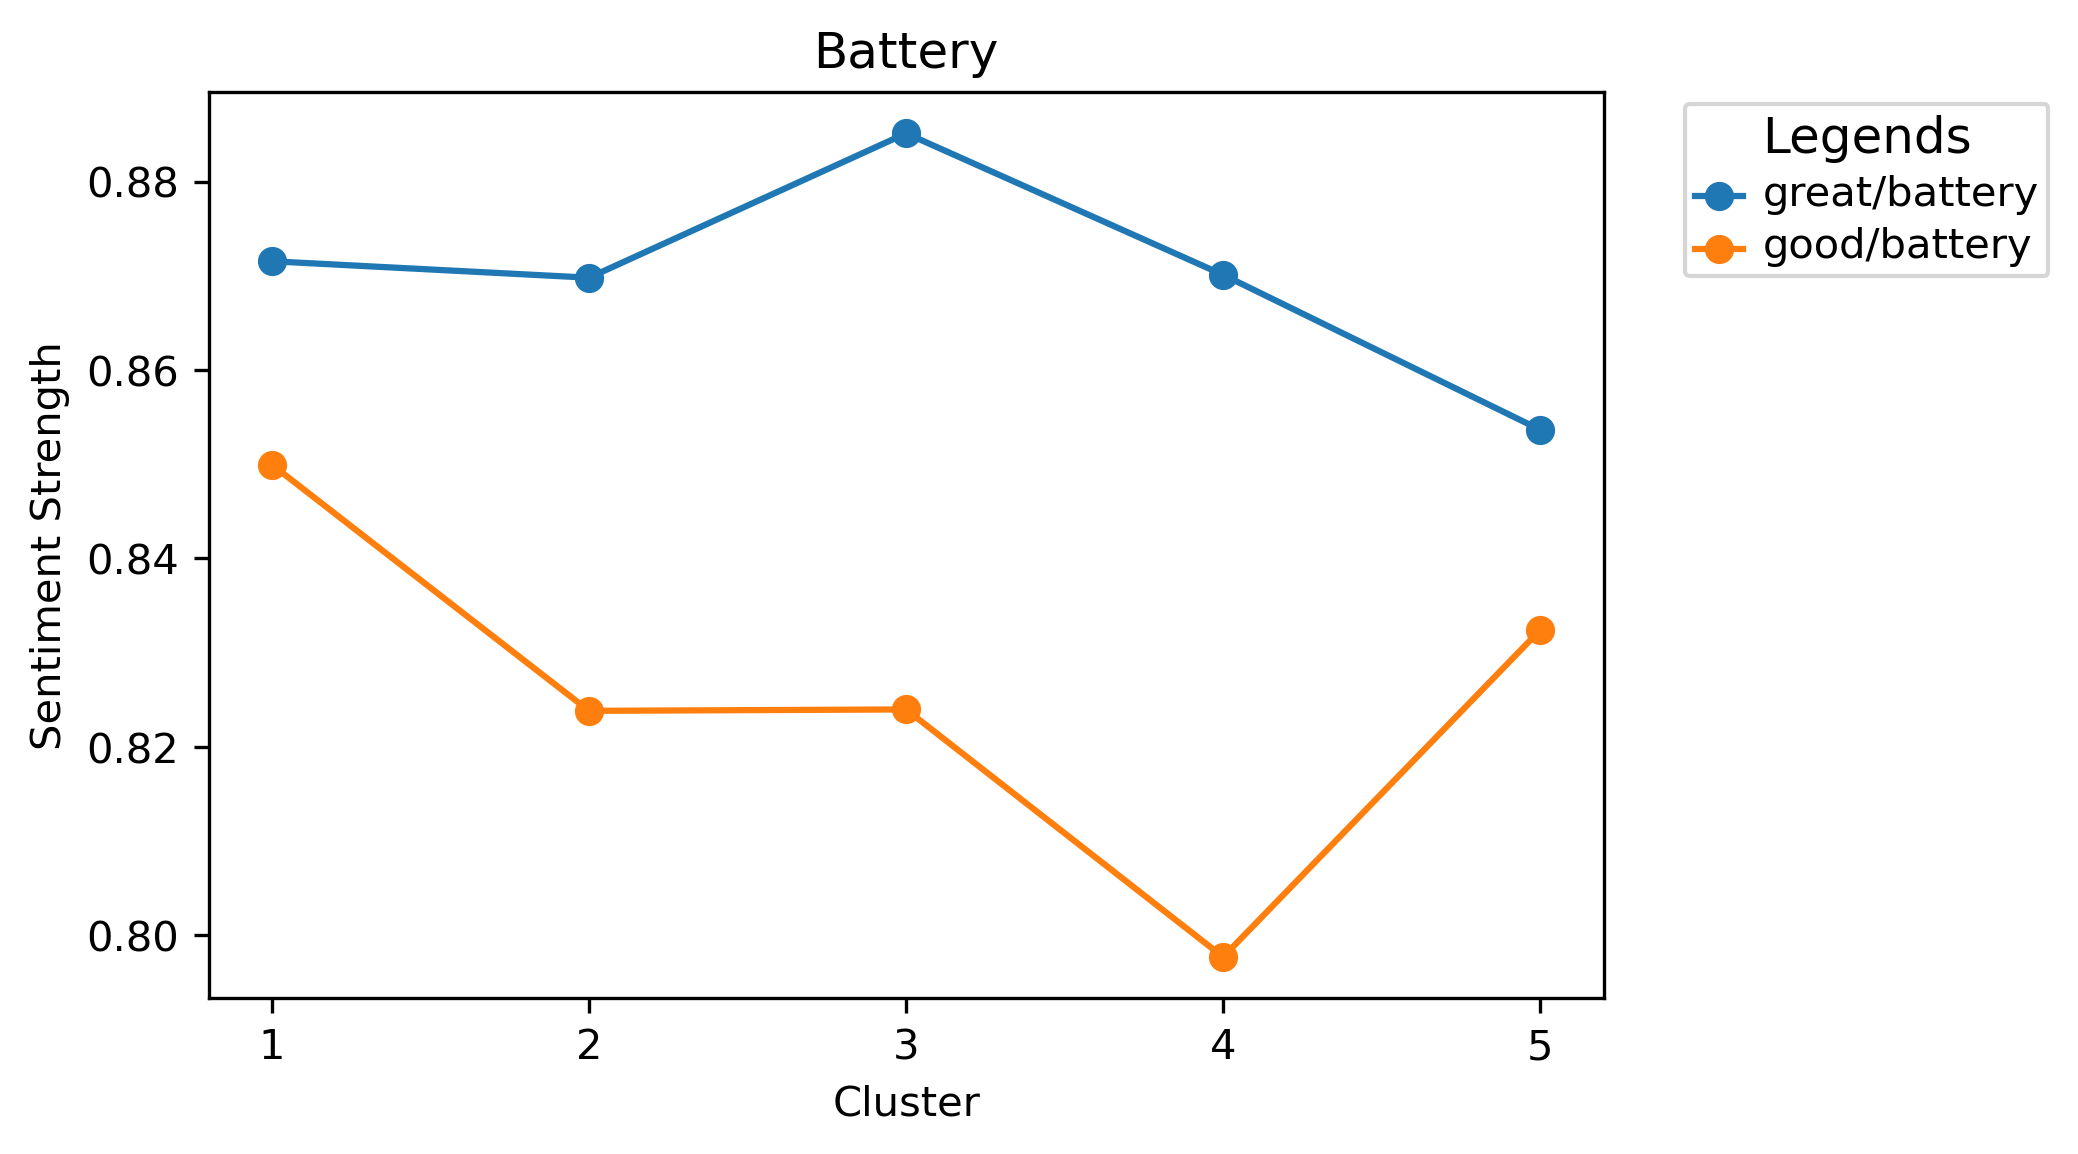

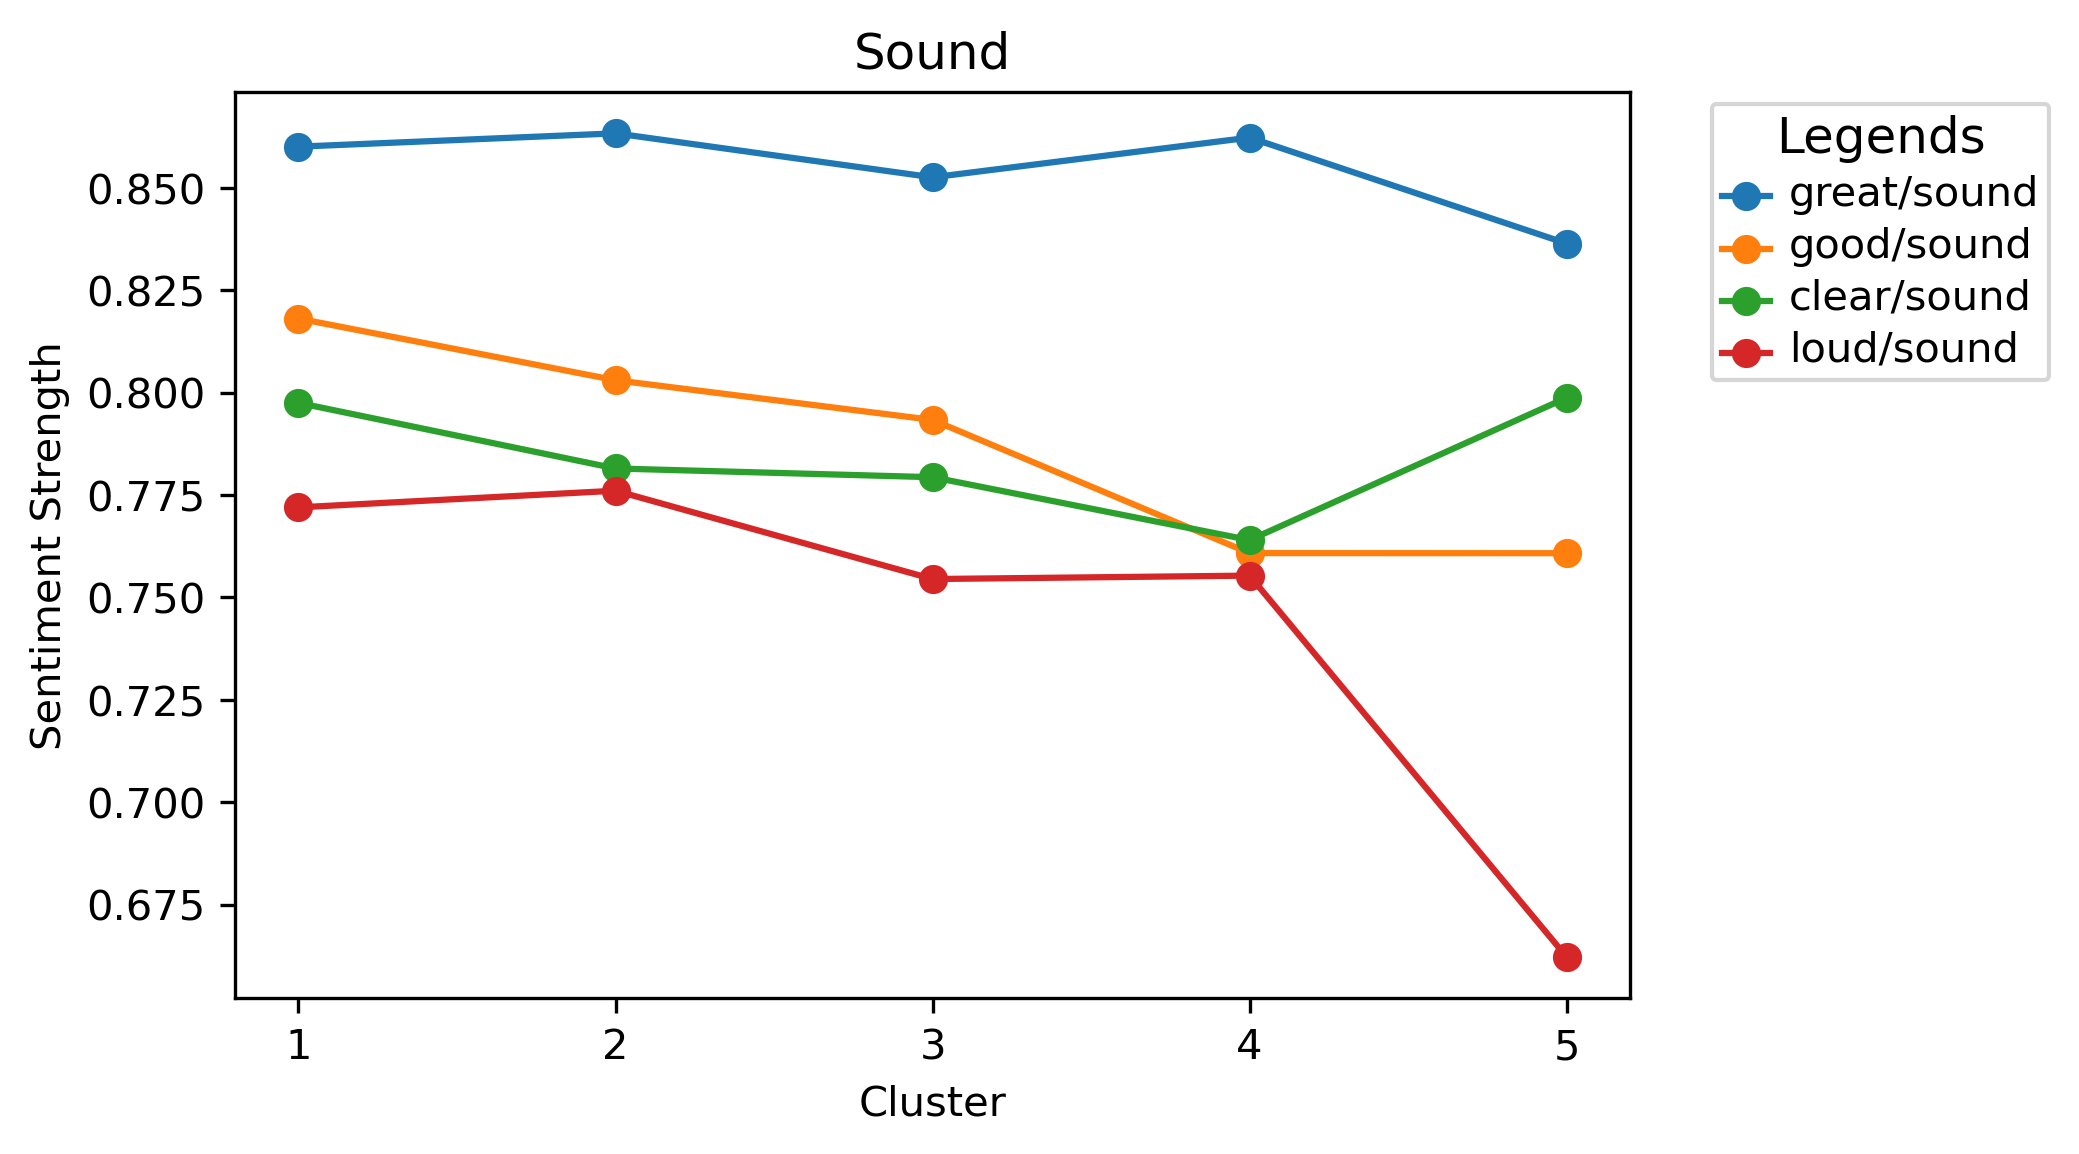

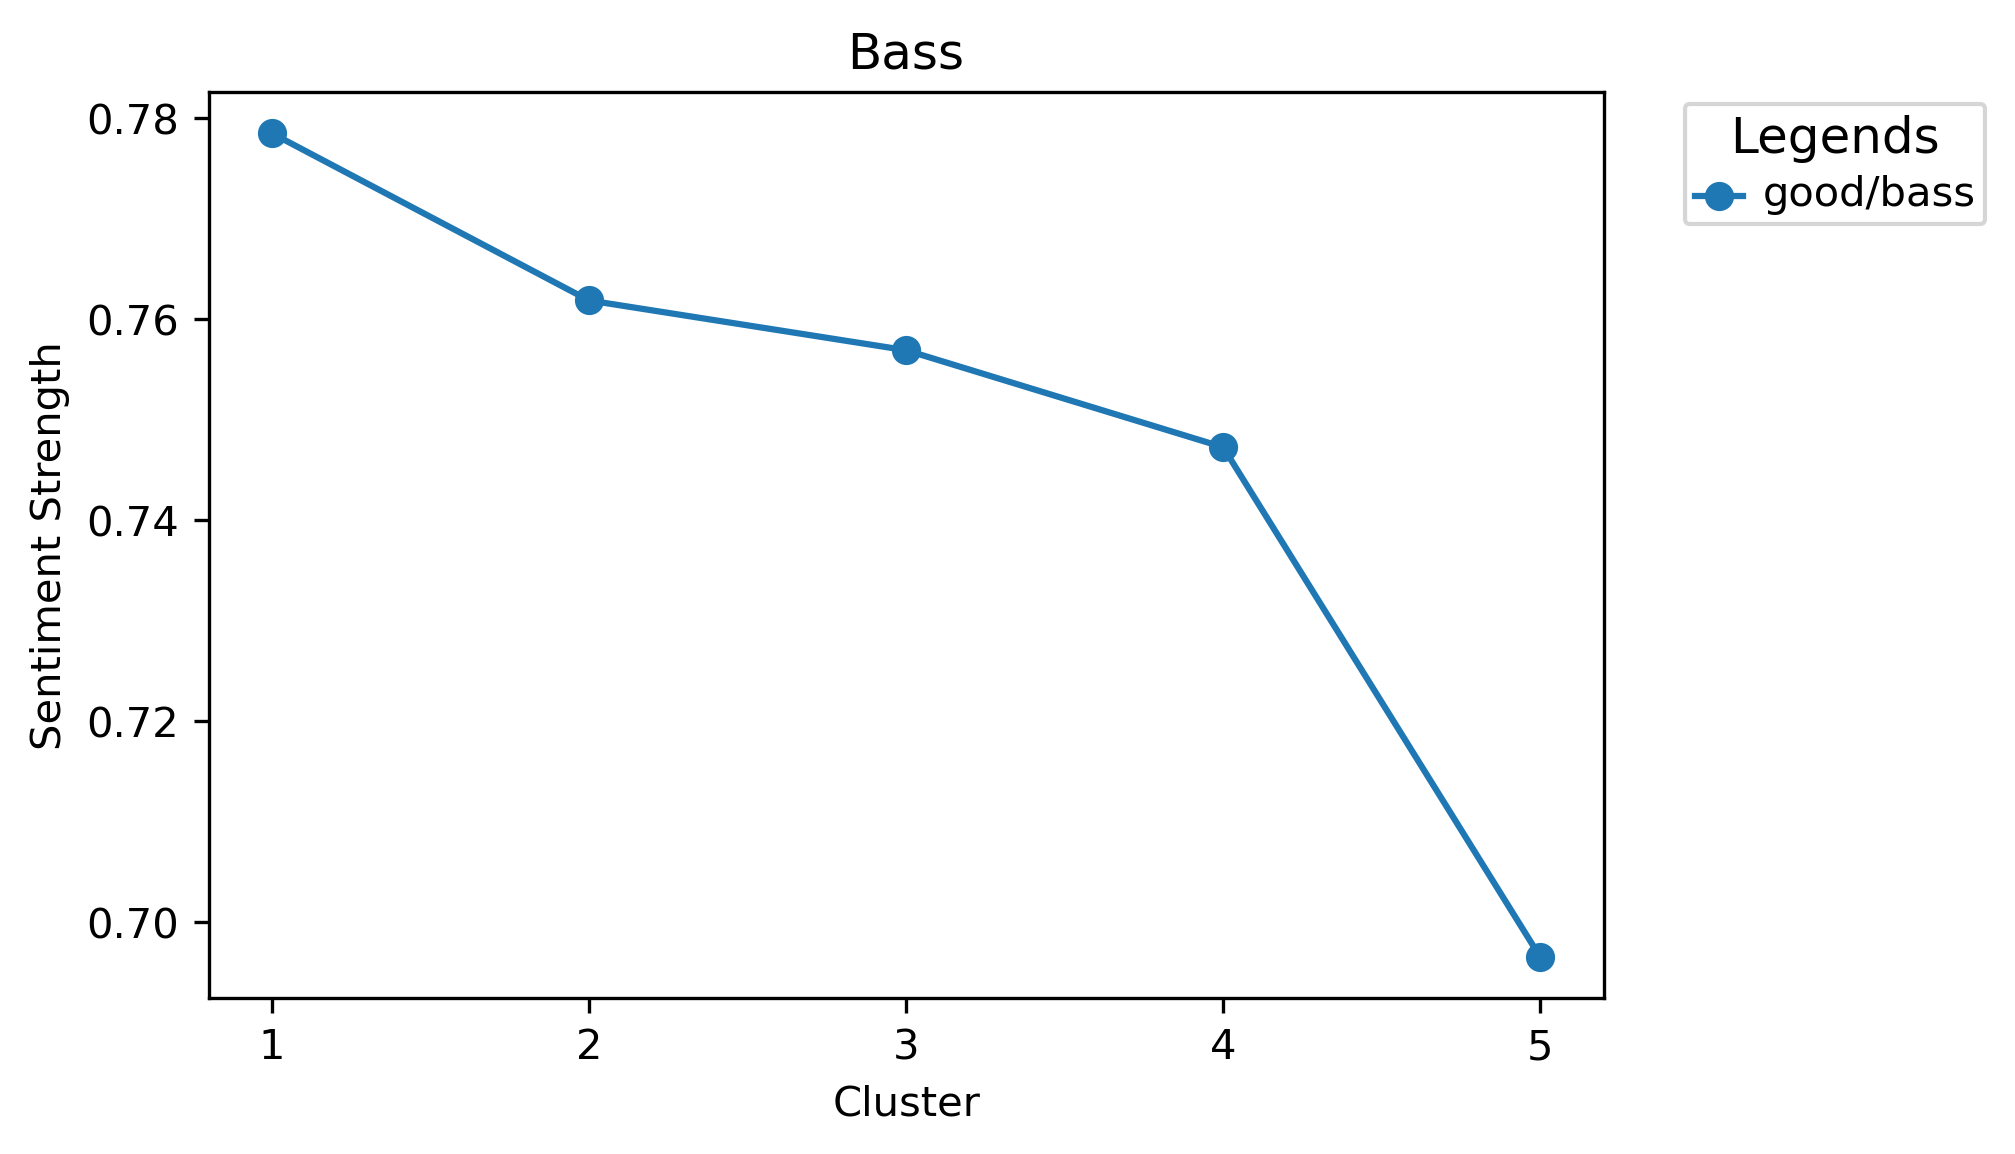

In [12]:
# Positive
print(feat_p_noun)
for i in range(len(feat_p_noun)):
    f = feat_p_noun[i]
    for i in range(len(feat_p)):
        a = feat_p[i]
        if a.rsplit('/', 1)[1] == f:
            x = np.array([1,2,3,4,5])
            y = np.array([df_st_p[df_st_p['Feature'] == a]['Strength'].to_string(index=False),
                          df_st_p[df_st_p['Feature.1'] == a]['Strength.1'].to_string(index=False),
                          df_st_p[df_st_p['Feature.2'] == a]['Strength.2'].to_string(index=False),
                          df_st_p[df_st_p['Feature.3'] == a]['Strength.3'].to_string(index=False),
                          df_st_p[df_st_p['Feature.4'] == a]['Strength.4'].to_string(index=False)])
            for b, word in enumerate(y):
                if word == 'Series([], )':
                    y[b] = 'nan'
            y = y.astype(float)

            plt.plot(x, y, 'o-', label=a)
            plt.xticks(x)
            legend = plt.legend(title='Legends', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
            legend.get_title().set_fontsize('12') #legend 'Title' fontsize
            plt.setp(plt.gca().get_legend().get_texts(), fontsize='10') #legend 'List' fontsize

    plt.figure
    plt.title(f.capitalize())
    plt.xlabel('Cluster')
    plt.ylabel('Sentiment Strength')
    plt.savefig("st_p_" + str(f) + ".png", format="png", dpi=300, bbox_inches = "tight")    
    plt.show()

['quality', 'battery', 'volume']


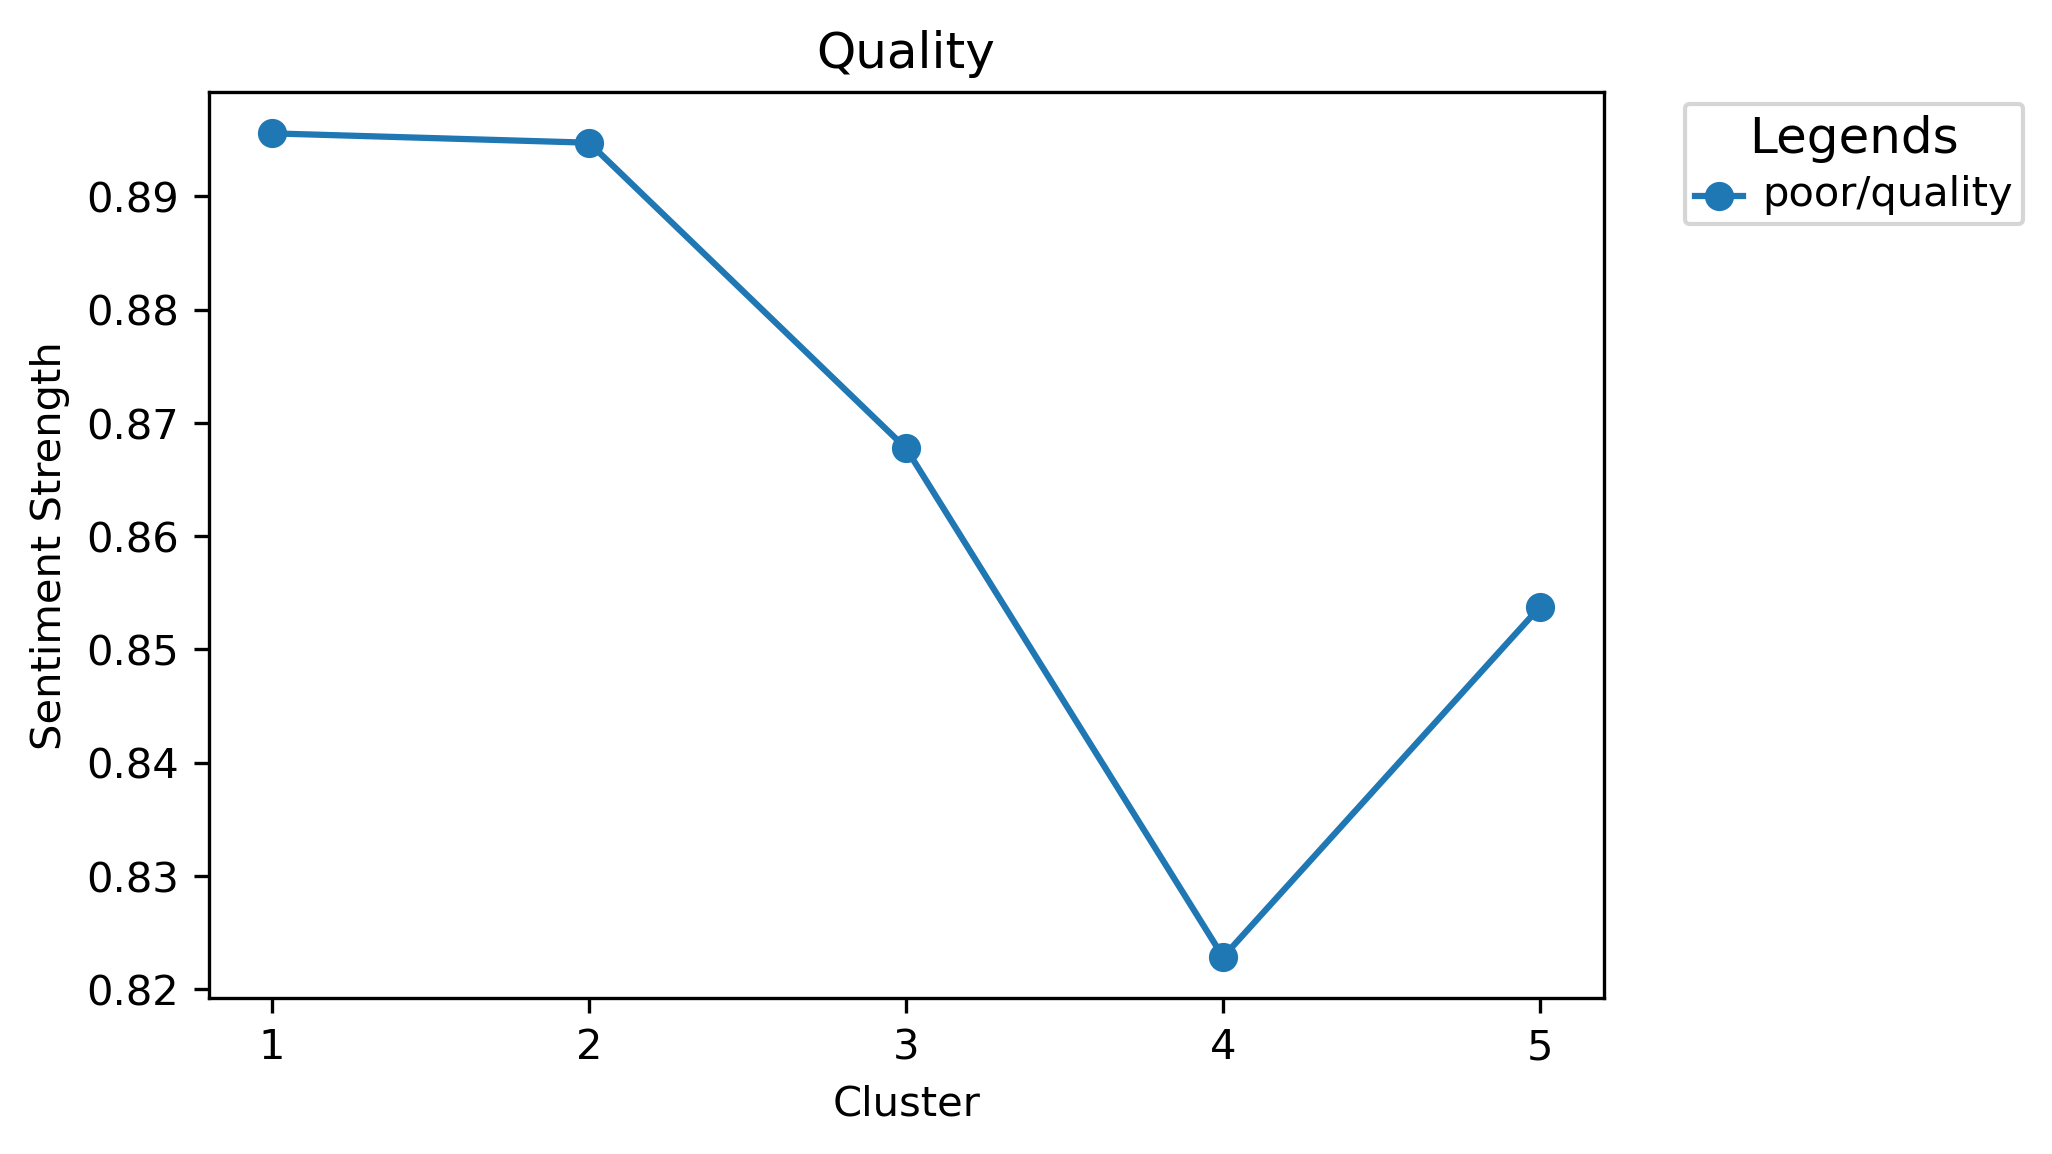

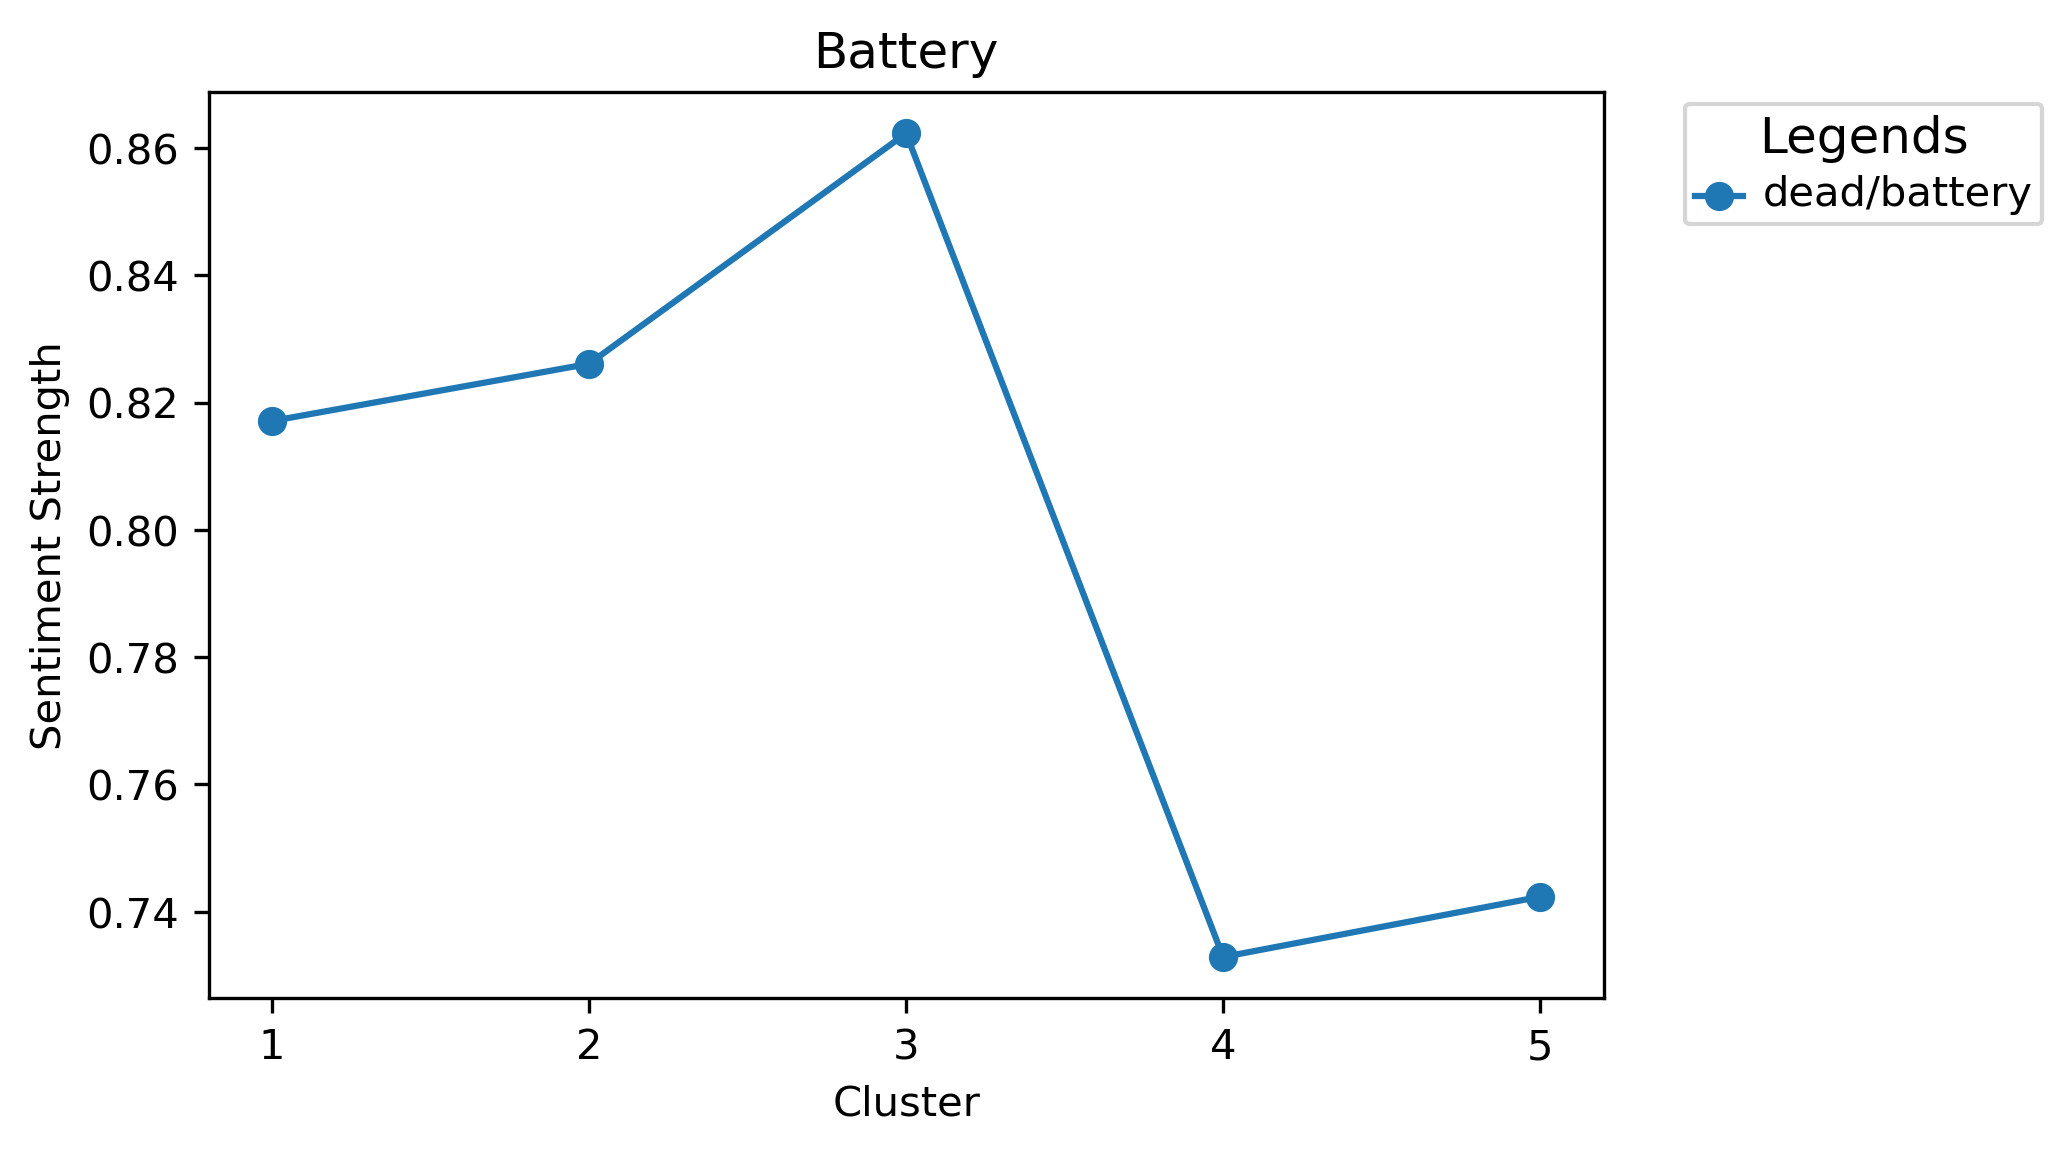

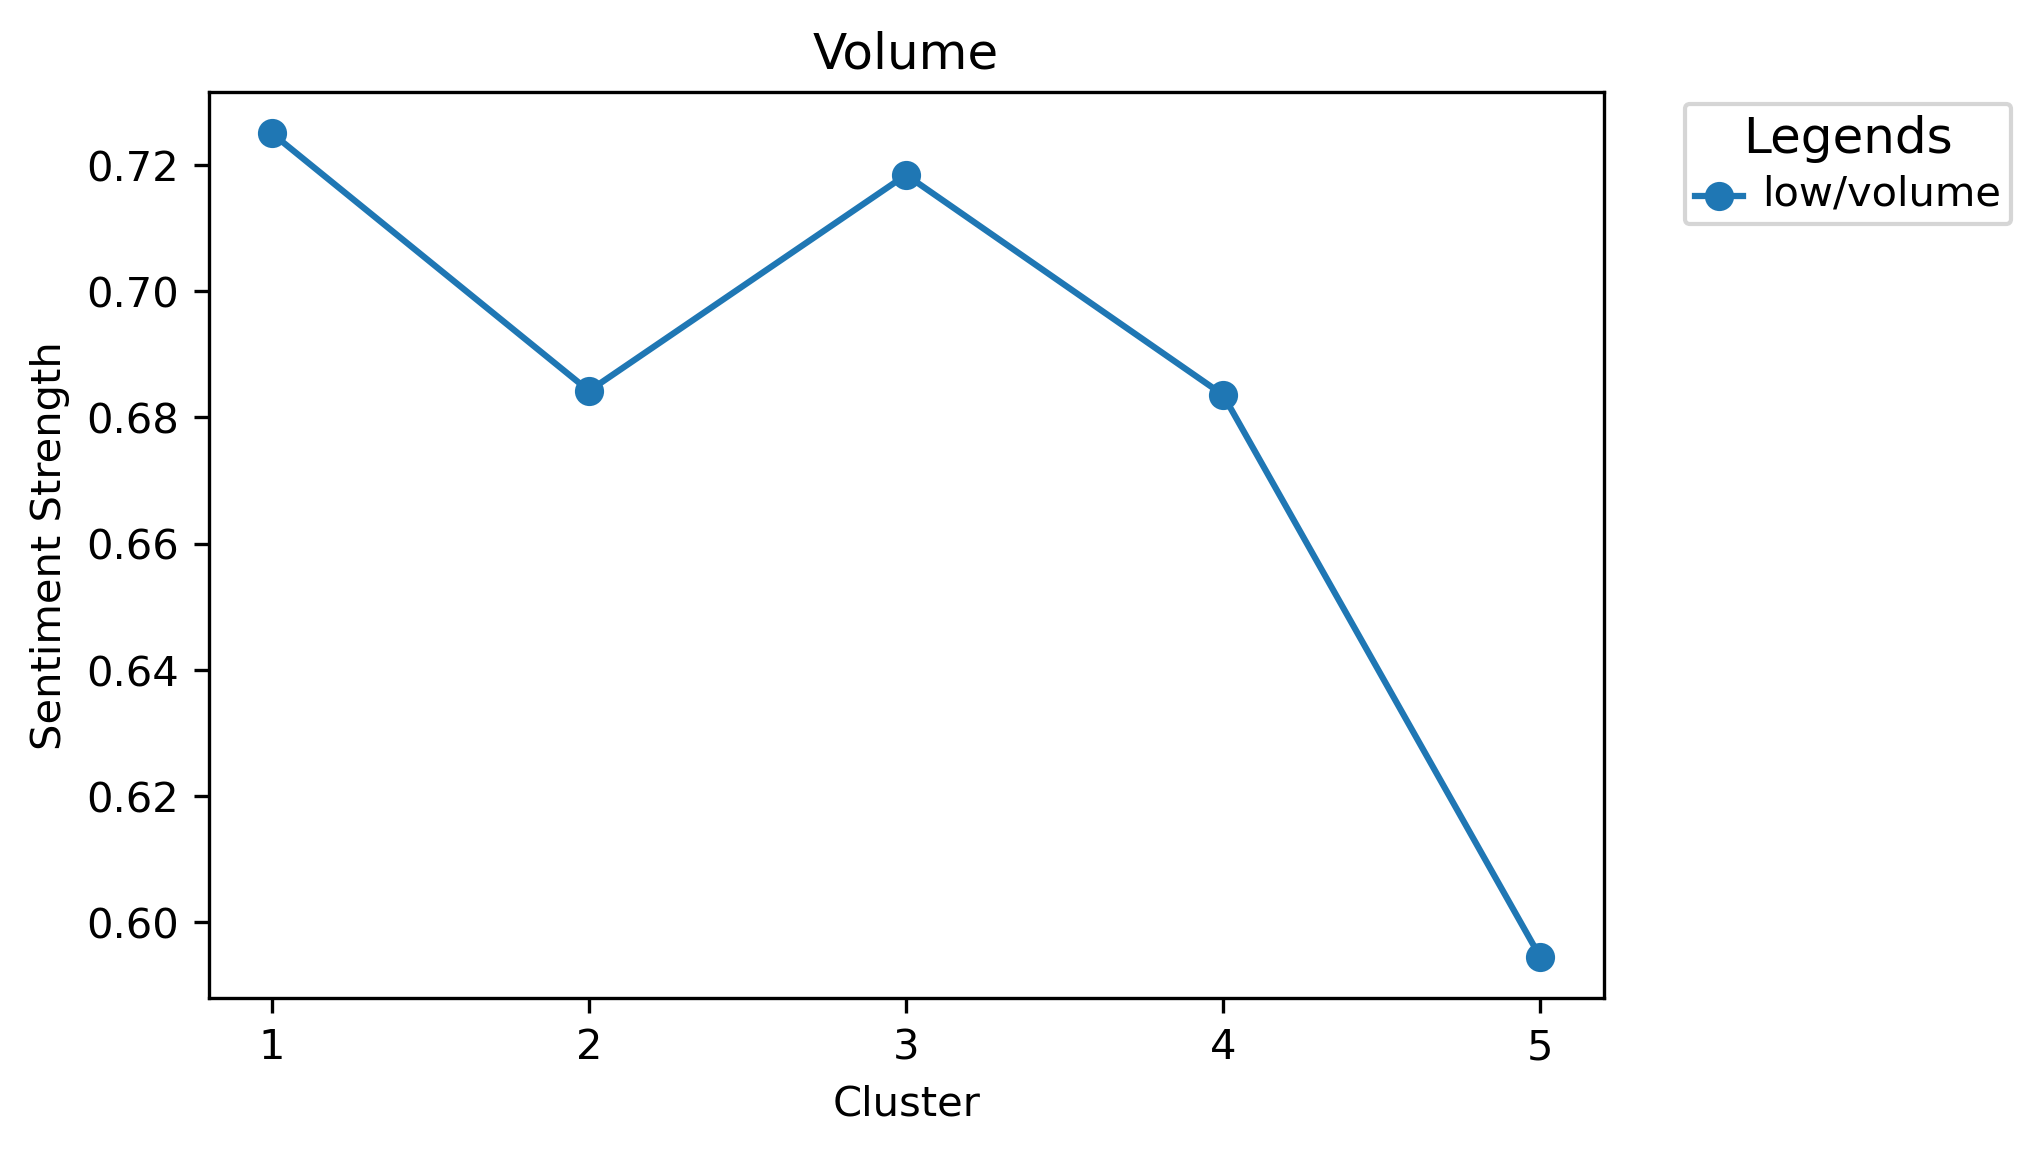

In [13]:
# Negative
print(feat_n_noun)
for i in range(len(feat_n_noun)):
    f = feat_n_noun[i]
    for i in range(len(feat_n)):
        a = feat_n[i]
        if a.rsplit('/', 1)[1] == f:
            x = np.array([1,2,3,4,5])
            y = np.array([df_st_n[df_st_n['Feature'] == a]['Strength'].to_string(index=False),
                          df_st_n[df_st_n['Feature.1'] == a]['Strength.1'].to_string(index=False),
                          df_st_n[df_st_n['Feature.2'] == a]['Strength.2'].to_string(index=False),
                          df_st_n[df_st_n['Feature.3'] == a]['Strength.3'].to_string(index=False),
                          df_st_n[df_st_n['Feature.4'] == a]['Strength.4'].to_string(index=False)])
            for b, word in enumerate(y):
                if word == 'Series([], )':
                    y[b] = 'nan'
            y = y.astype(float)

            plt.plot(x, y, 'o-', label=a)
            plt.xticks(x)
            legend = plt.legend(title='Legends', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
            legend.get_title().set_fontsize('12') #legend 'Title' fontsize
            plt.setp(plt.gca().get_legend().get_texts(), fontsize='10') #legend 'List' fontsize

    plt.figure
    plt.title(f.capitalize())
    plt.xlabel('Cluster')
    plt.ylabel('Sentiment Strength')
    plt.savefig("st_n_" + str(f) + ".png", format="png", dpi=300, bbox_inches = "tight")    
    plt.show()